In [ ]:
# 라이브러리 연결
import pandas as pd
import matplotlib.pyplot as plt
import sys
import seaborn as sns
import numpy as np
import copy

# 지난 과제에 사용한 min-max scaling , z-score를 진행해주는 함수
def feture_scaling(df, scaling_strategy="min-max", column=None):
    for column_name in column:
        if scaling_strategy == "min-max":
            df[column_name] = ( df[column_name] - df[column_name].min() ) /(df[column_name].max() - df[column_name].min())  #minmax scaler 로 변환
        elif scaling_strategy == "z-score":
            df[column_name] = (df[column_name]-df[column_name].mean() ) /(df[column_name].std() )
    return df

#화면에 출력되는 row수를 999로 수정한다.
pd.options.display.max_rows = 999 

# 연도별 파일 읽기
h5 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/happiness_2015.csv')
h6 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/happiness_2016.csv')
h7 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/happiness_2017.csv')
h8 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/happiness_2018.csv')
h9 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/happiness_2019.csv')

total_country = h5['Country'].unique() # 모든 나라 이름 저장해놓기
total_region = h5['Region'].unique() # 모든 지역 이름 저장해놓기

#행복 지수 측정 나라 수  (2015년 기준)
print('행복지수 측정 나라 수 : ', len(total_country))
print('행복지수 측정 지역 수 : ', len(total_region))

#연도별로 Column명이 다르기 때문에 column 명 공통으로 바꾸기
h7.rename(columns =  {"Happiness.Rank":"Happiness Rank","Happiness.Score":"Happiness Score","Economy..GDP.per.Capita.":"Economy (GDP per Capita)","Health..Life.Expectancy.":"Health (Life Expectancy)","Trust..Government.Corruption.":"Trust (Government Corruption)","Dystopia.Residual" : "Dystopia Residual"}, inplace = True)
h8.rename(columns =  {"Overall rank":"Happiness Rank","Country or region":"Country","Score":"Happiness Score","GDP per capita":"Economy (GDP per Capita)","Healthy life expectancy":"Health (Life Expectancy)","Freedom to make life choices":"Freedom","Perceptions of corruption" : "Trust (Government Corruption)"}, inplace = True)
h9.rename(columns =  {"Overall rank":"Happiness Rank","Country or region":"Country","Score":"Happiness Score","GDP per capita":"Economy (GDP per Capita)","Healthy life expectancy":"Health (Life Expectancy)","Freedom to make life choices":"Freedom","Perceptions of corruption" : "Trust (Government Corruption)"}, inplace = True)

region_by_country = {}# 나라별 지역
country_by_region = {}# 지역별 나라

#'Region이 없는 연도 17,18,19년도에 한해 Region column을 생성해준다
for i in range(len(total_region)) : 
  list_country = list(h5[h5['Region']==total_region[i]]['Country']) #각 지역별 나라들을
  country_by_region[total_region[i]] = list_country #지역별로 딕셔너리에 리스트로 입력
  for j in list_country :  #각 나라별로 지역 입력해주는 부분
    region_by_country[j] =total_region[i]
     

# Region을 map을 통해 구현한다.
h7['Region'] = h7['Country'].map(region_by_country)
h8['Region'] = h8['Country'].map(region_by_country)
h9['Region'] = h9['Country'].map(region_by_country)

#pd별 연도 컬럼 생성
h5['year'] = 2015
h6['year'] = 2016
h7['year'] = 2017
h8['year'] = 2018
h9['year'] = 2019

# 지역마다 행복지수 나라 출력
for i in country_by_region.keys() :
  print('Region : {} , {} '.format(i,len(country_by_region[i])))

행복지수 측정 나라 수 :  158
행복지수 측정 지역 수 :  10

Region : Western Europe , 21 
Region : North America , 2 
Region : Australia and New Zealand , 2 
Region : Middle East and Northern Africa , 20 
Region : Latin America and Caribbean , 22 
Region : Southeastern Asia , 9 
Region : Central and Eastern Europe , 29 
Region : Eastern Asia , 6 
Region : Sub-Saharan Africa , 40 
Region : Southern Asia , 7 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Basic Each Region Happiness Score Western Europe
Min Country :  Greece    Greece    Portugal    Greece    Greece    
Max Country :  Switzerland    Denmark    Norway    Finland    Finland    


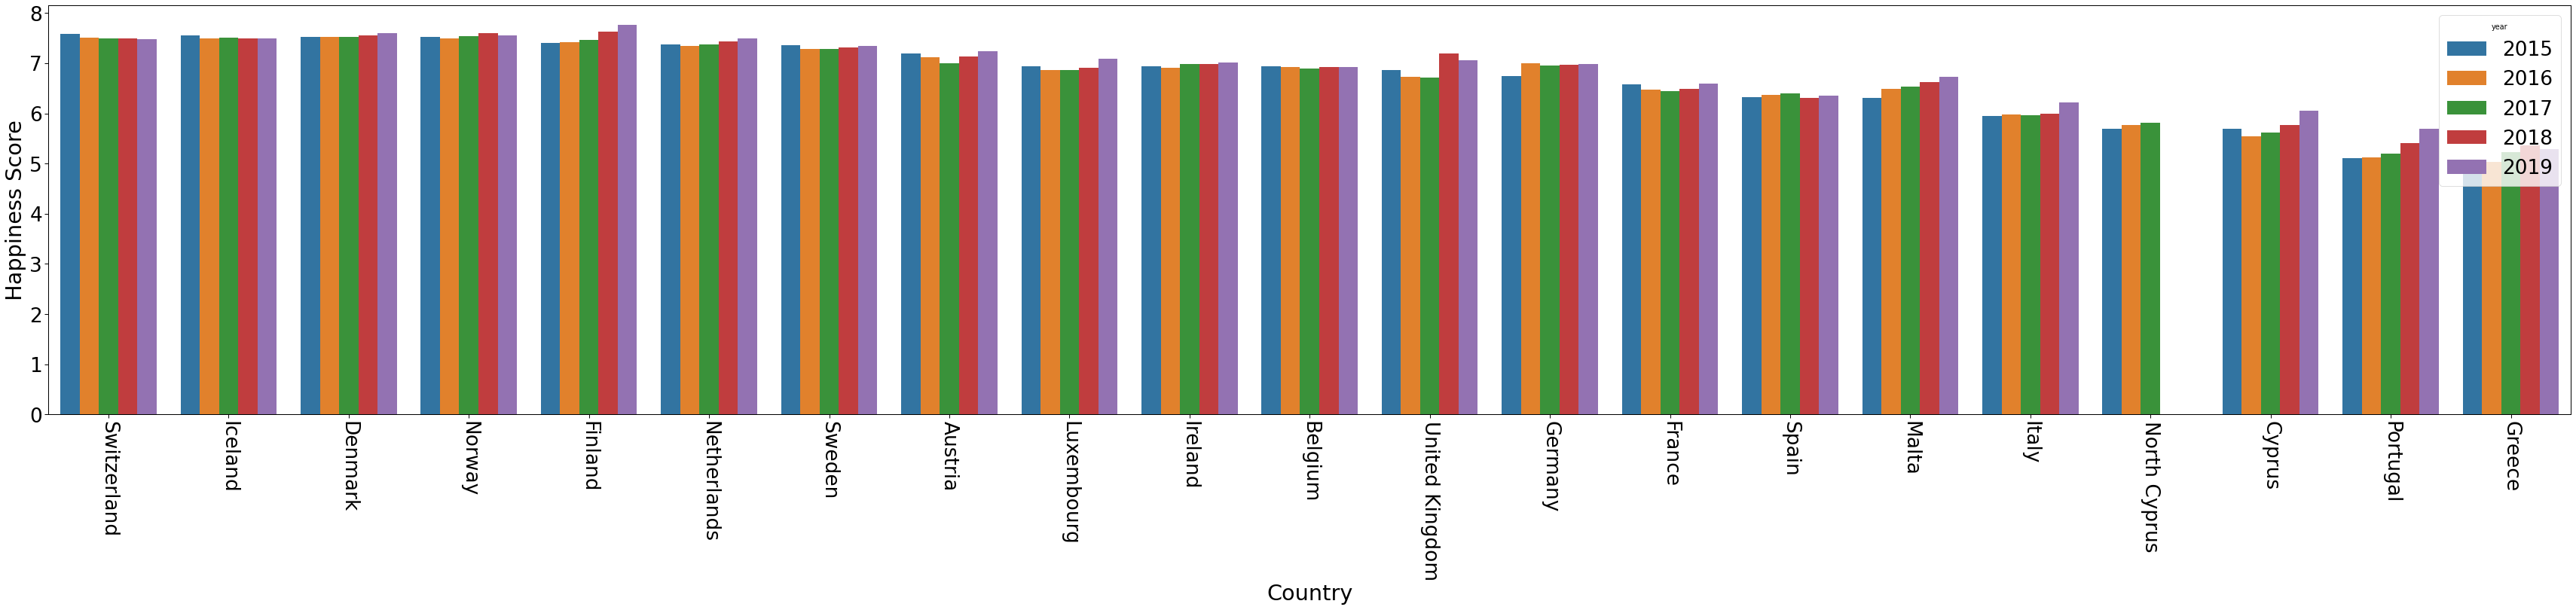

Basic Each Region Happiness Score North America
Min Country :  United States    United States    United States    United States    United States    
Max Country :  Canada    Canada    Canada    Canada    Canada    


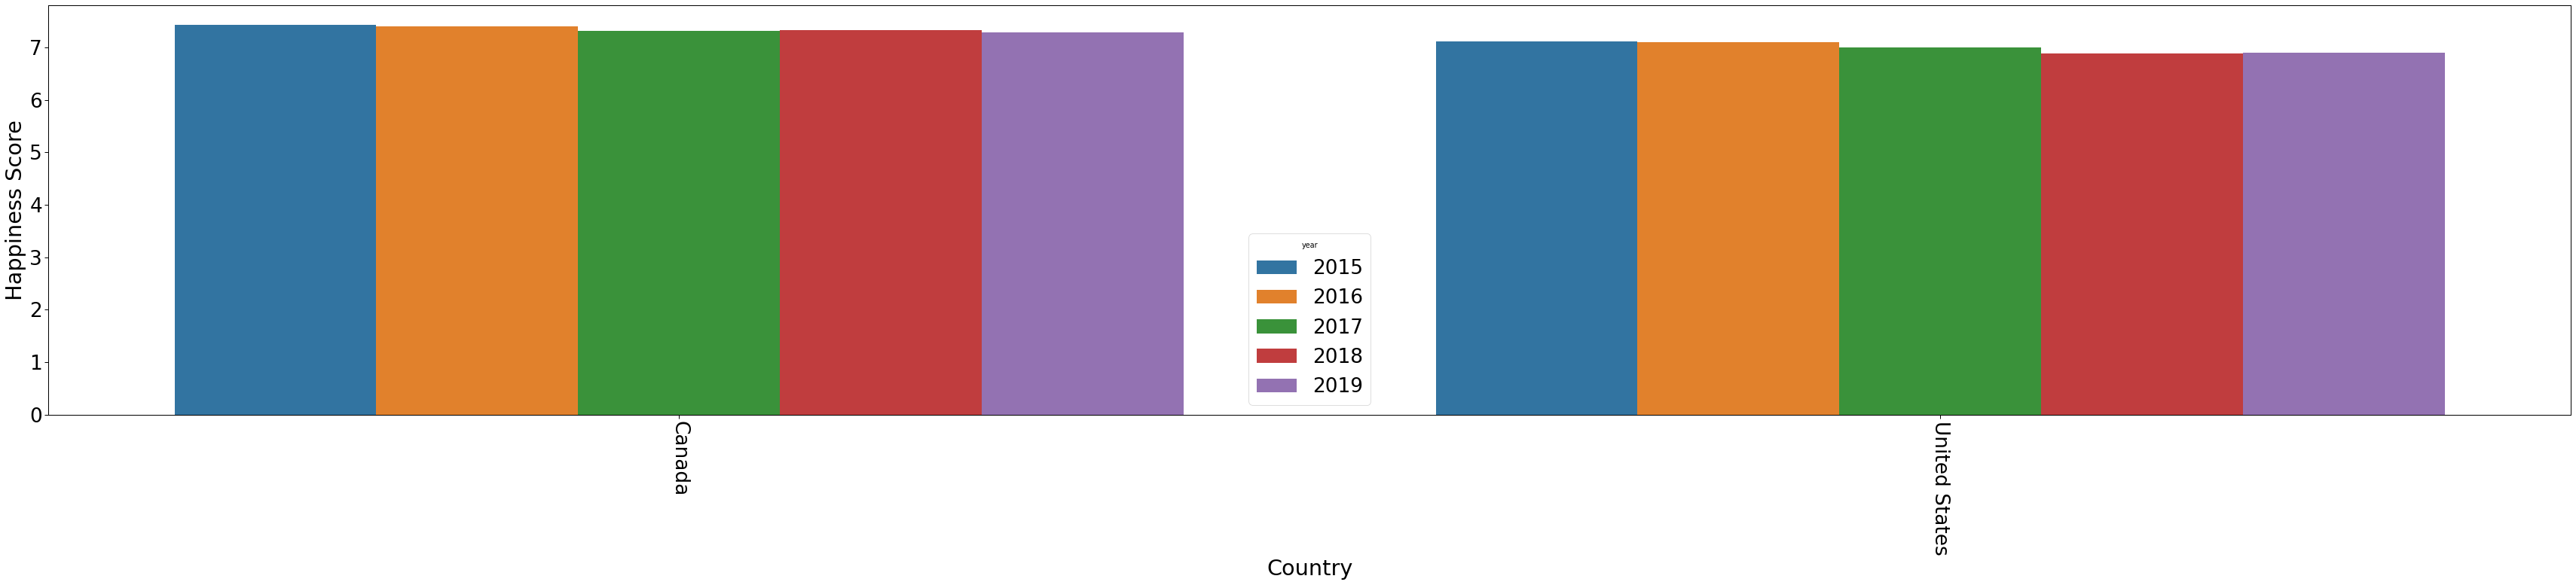

Basic Each Region Happiness Score Australia and New Zealand
Min Country :  Australia    Australia    Australia    Australia    Australia    
Max Country :  New Zealand    New Zealand    New Zealand    New Zealand    New Zealand    


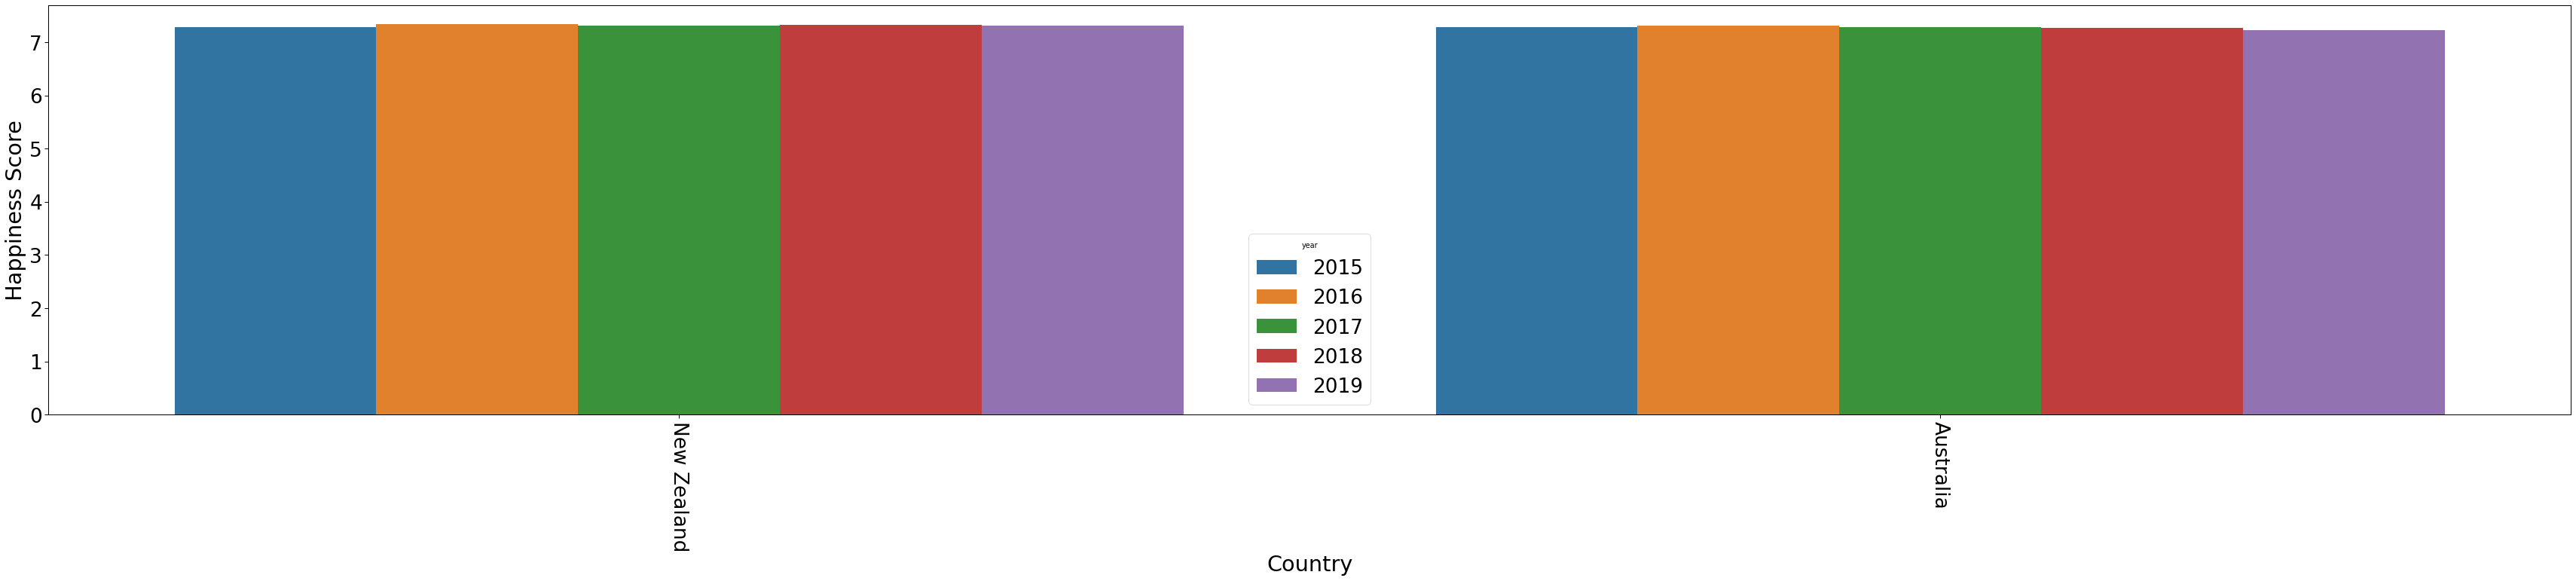

Basic Each Region Happiness Score Middle East and Northern Africa
Min Country :  Syria    Syria    Syria    Yemen    Yemen    
Max Country :  Israel    Israel    Israel    Israel    Israel    


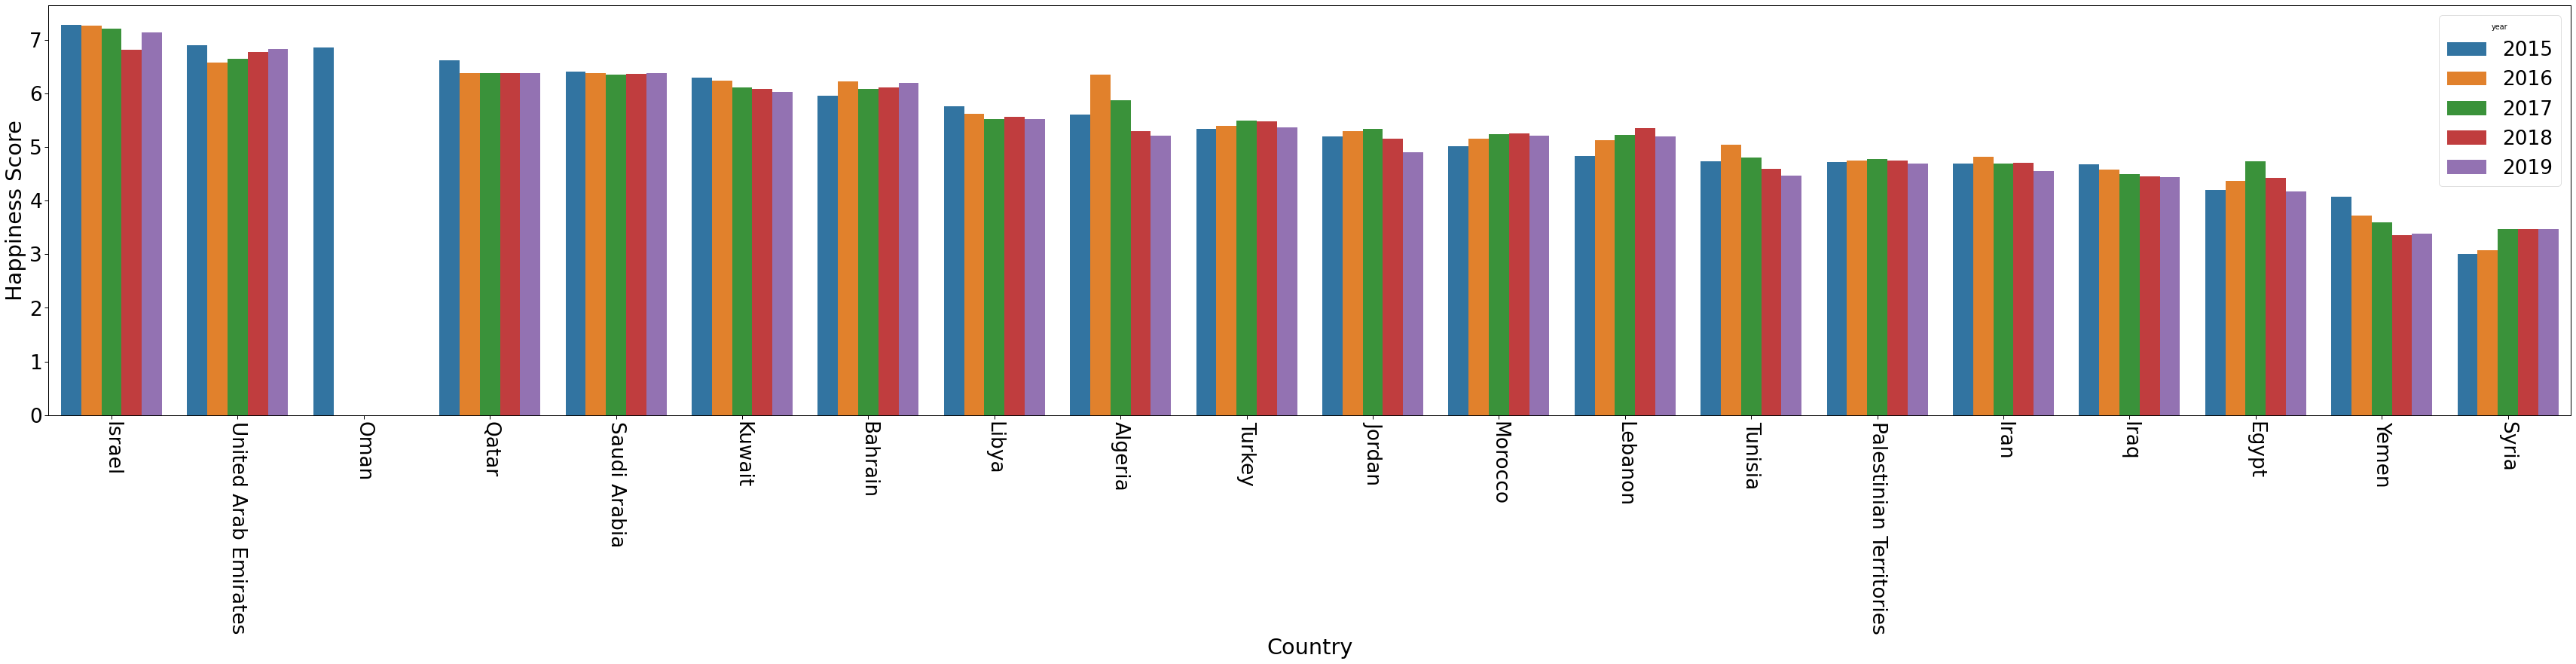

Basic Each Region Happiness Score Latin America and Caribbean
Min Country :  Haiti    Haiti    Haiti    Haiti    Haiti    
Max Country :  Costa Rica    Costa Rica    Costa Rica    Costa Rica    Costa Rica    


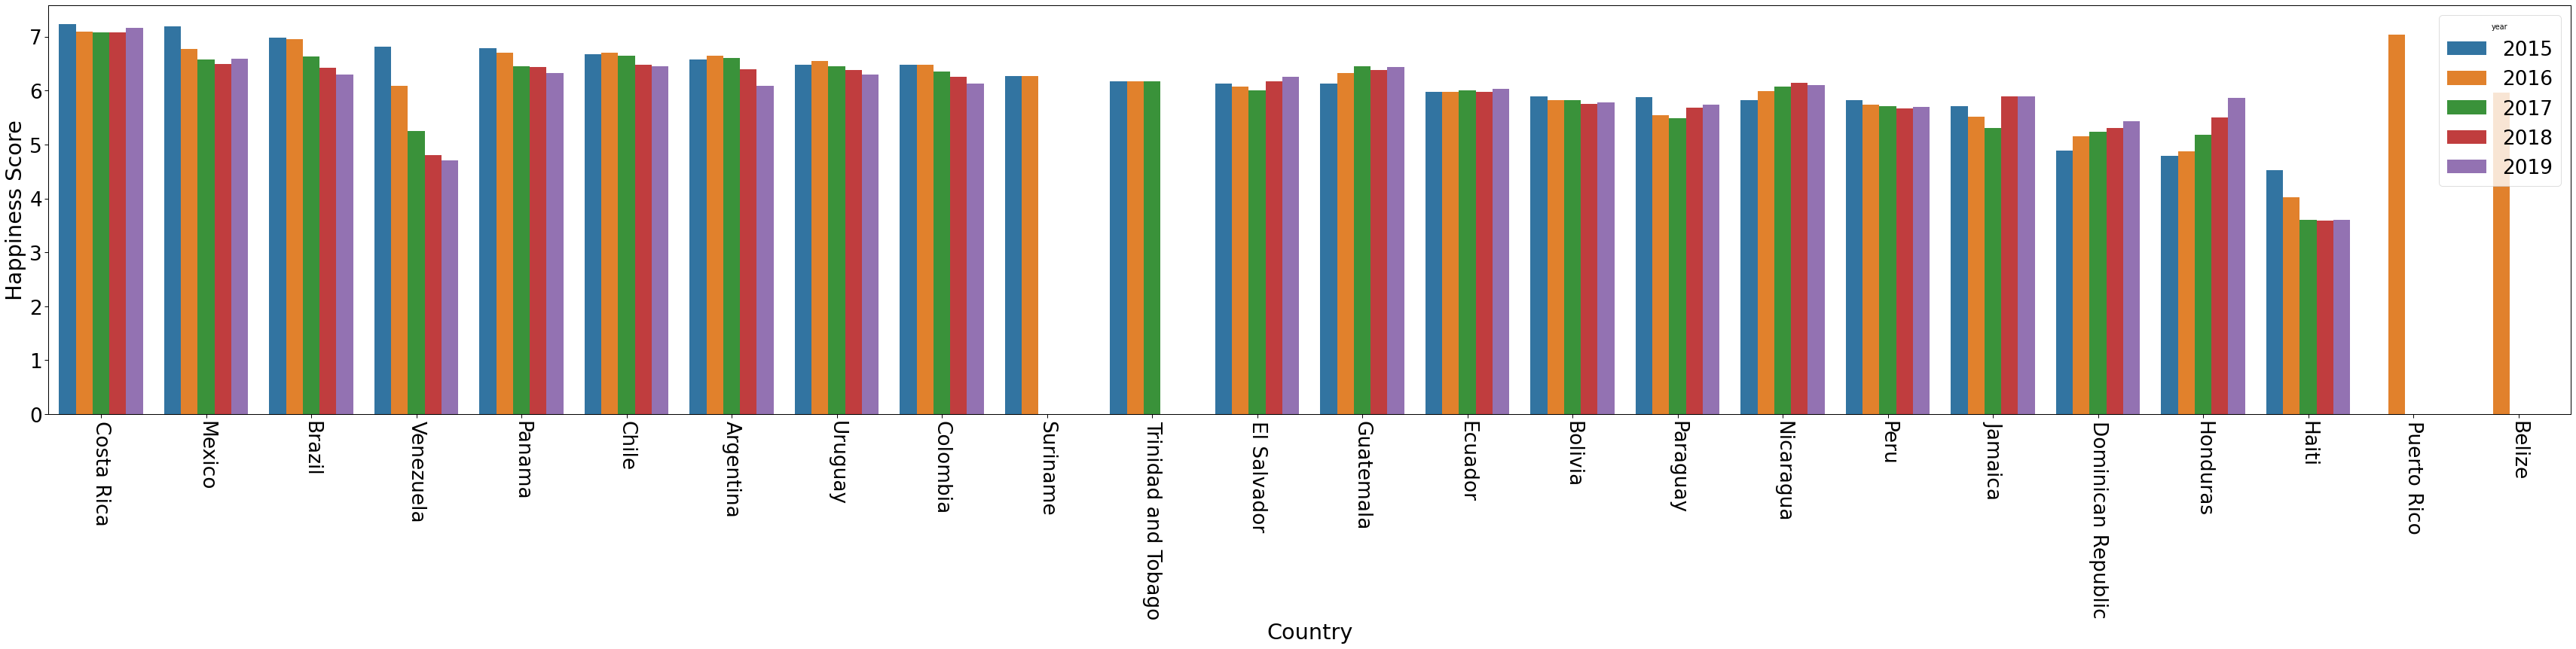

Basic Each Region Happiness Score Southeastern Asia
Min Country :  Cambodia    Cambodia    Cambodia    Myanmar    Myanmar    
Max Country :  Singapore    Singapore    Singapore    Singapore    Singapore    


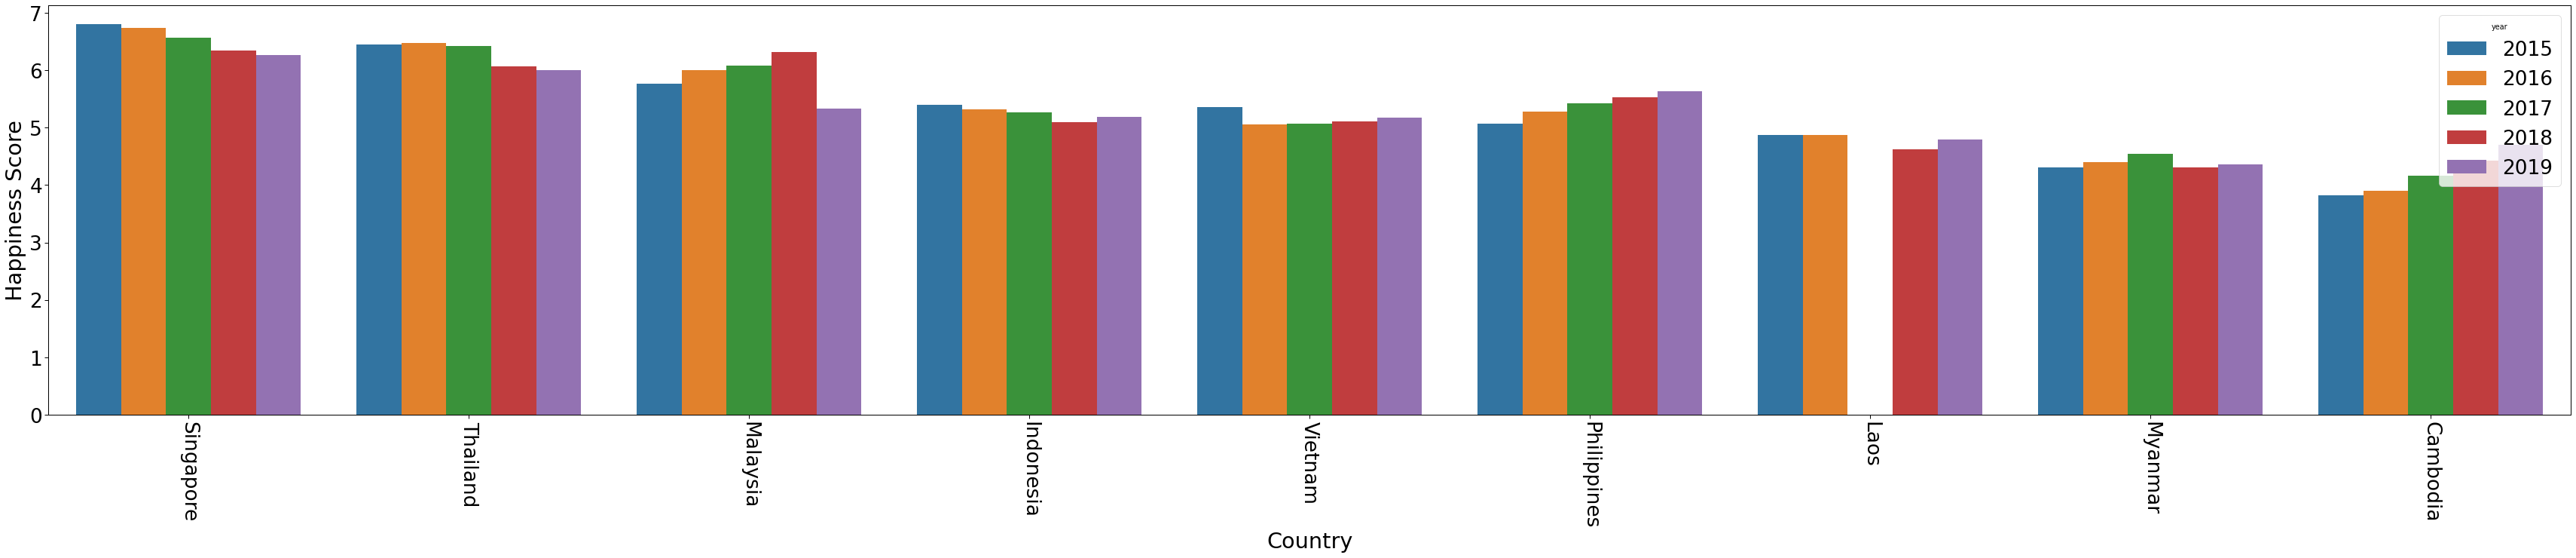

Basic Each Region Happiness Score Central and Eastern Europe
Min Country :  Bulgaria    Bulgaria    Ukraine    Ukraine    Ukraine    
Max Country :  Czech Republic    Czech Republic    Czech Republic    Czech Republic    Czech Republic    


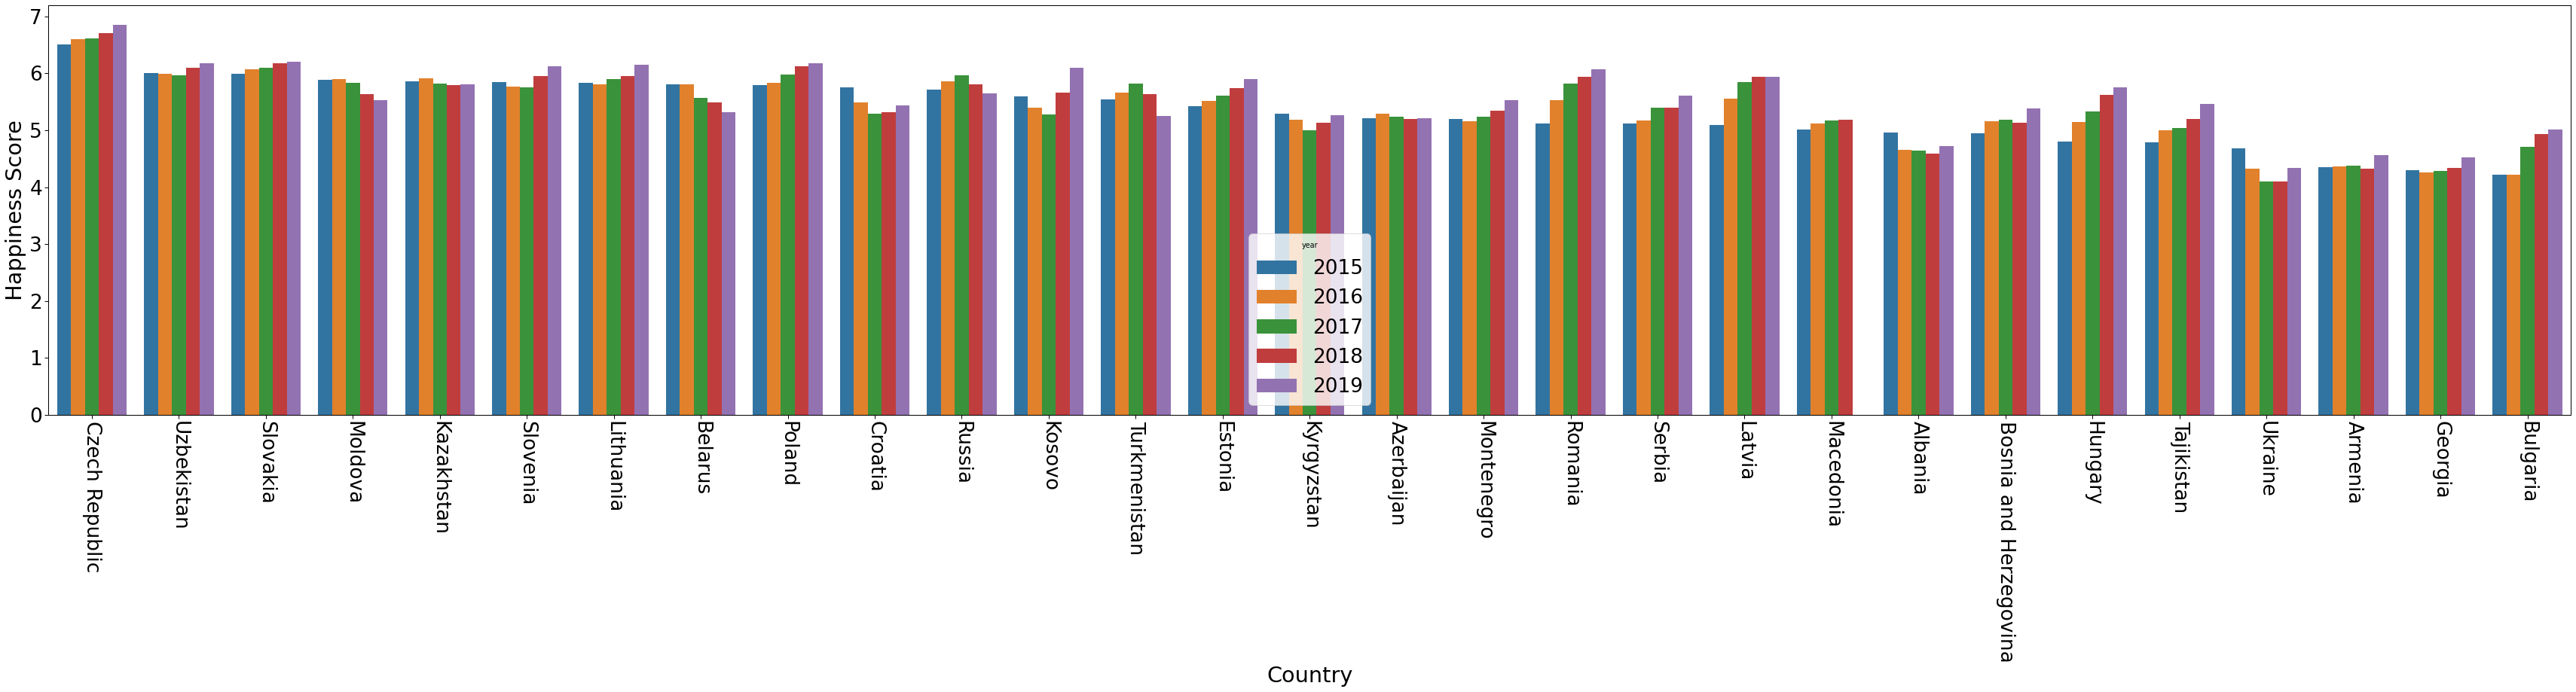

Basic Each Region Happiness Score Eastern Asia
Min Country :  Mongolia    Mongolia    Mongolia    Mongolia    China    
Max Country :  Taiwan    Taiwan    Japan    Taiwan    Taiwan    


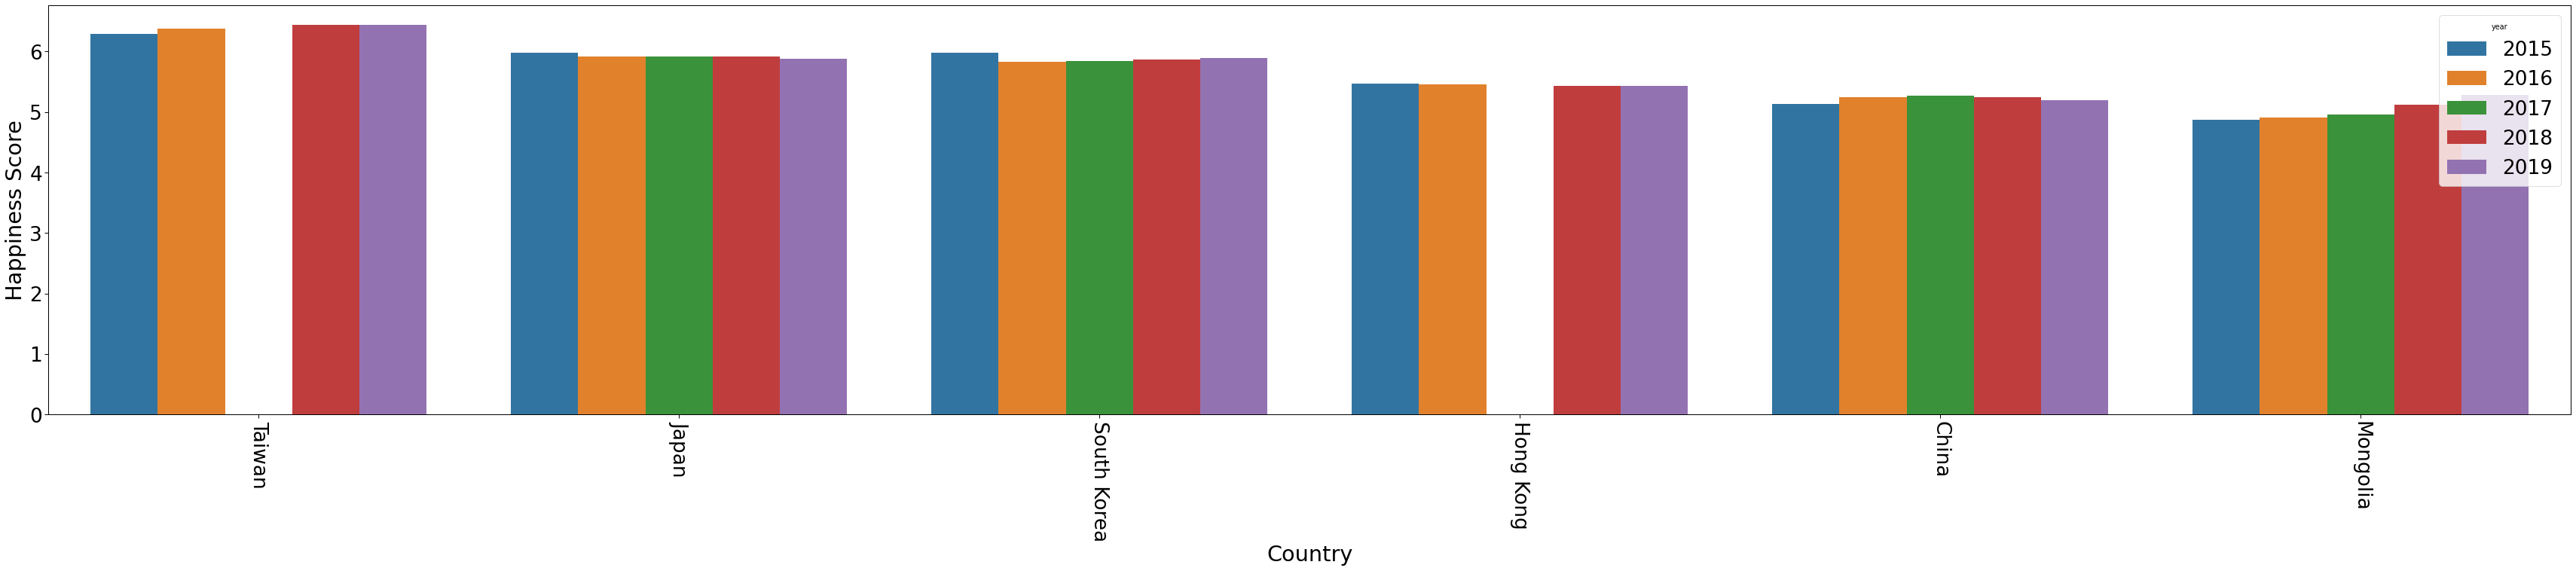

Basic Each Region Happiness Score Sub-Saharan Africa
Min Country :  Togo    Burundi    Central African Republic    Burundi    Central African Republic    
Max Country :  Mauritius    Mauritius    Mauritius    Mauritius    Mauritius    


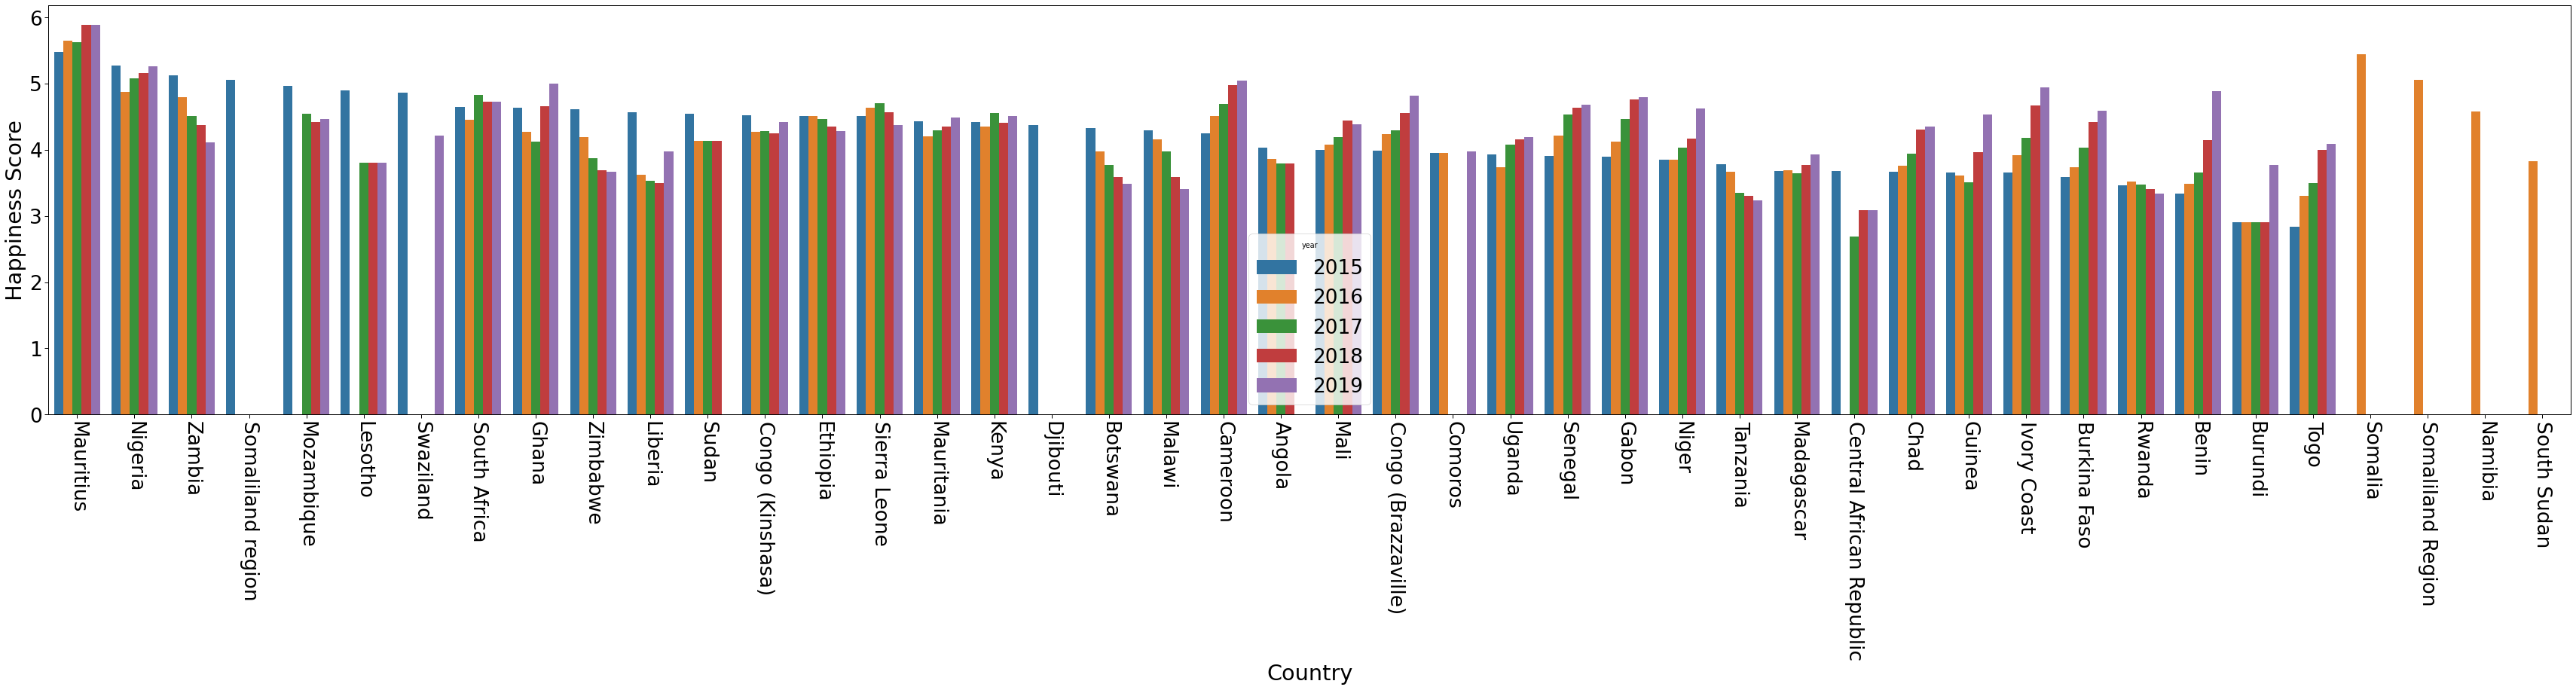

Basic Each Region Happiness Score Southern Asia
Min Country :  Afghanistan    Afghanistan    Afghanistan    Afghanistan    Afghanistan    
Max Country :  Bhutan    Bhutan    Pakistan    Pakistan    Pakistan    


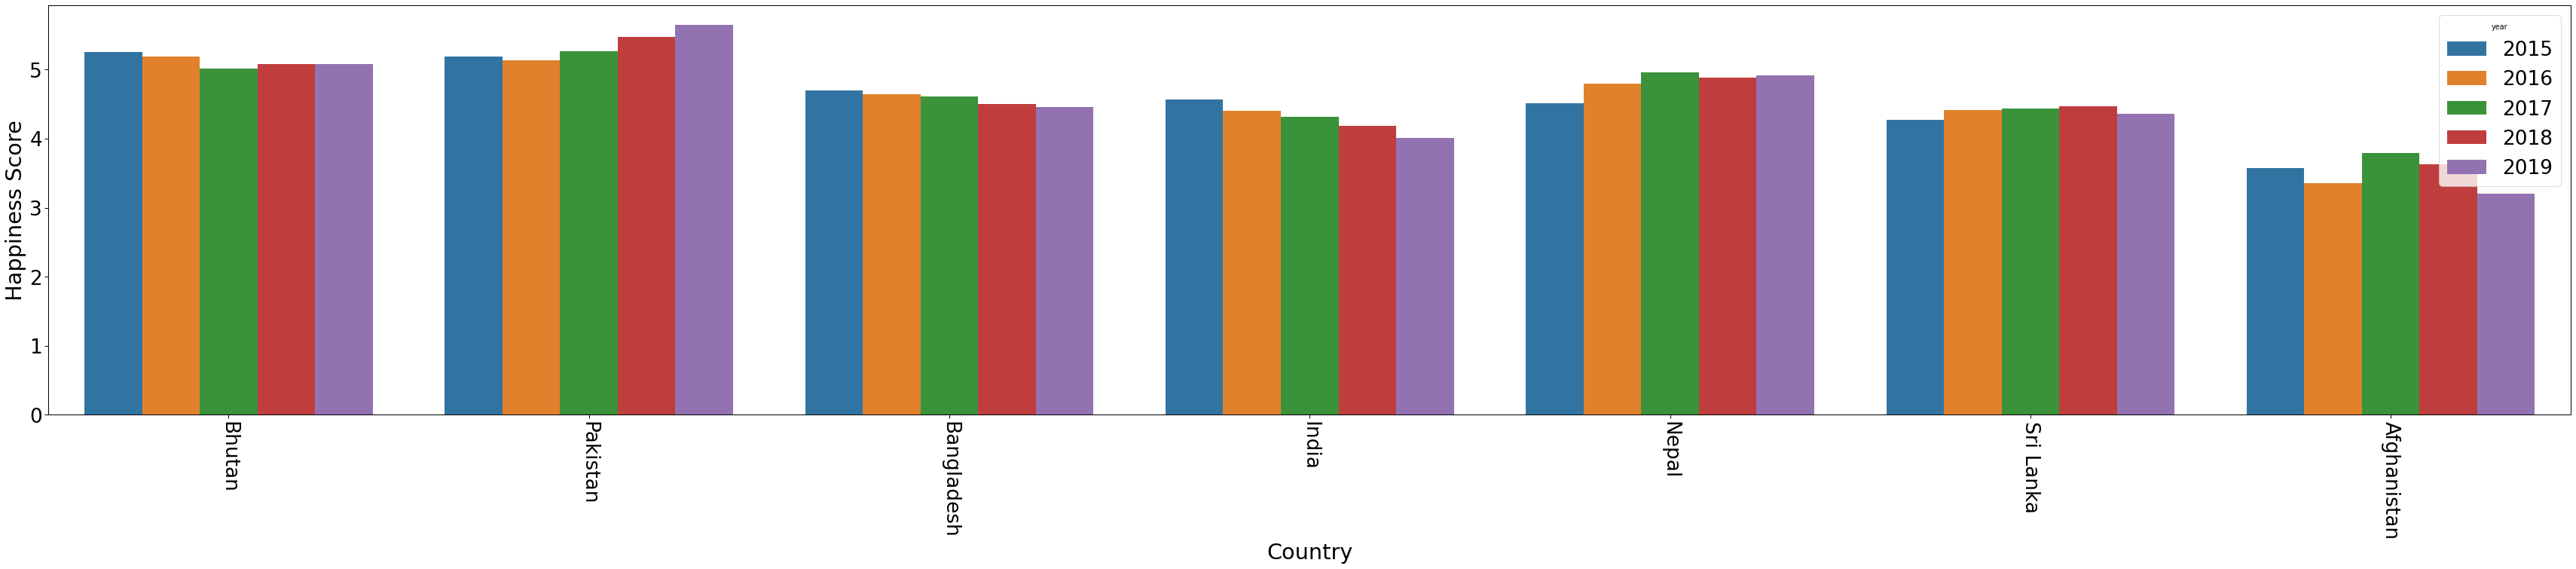

In [ ]:
sns.set_context("paper", font_scale=3) #텍스트 크기조정
# 연도별 행복 지수가 높은 나라,낮은 나라 리스트
max_year = []
min_year = []
file_all = [h5,h6,h7,h8,h9]            # 파일을 리스트화로 묶어놓기

# 지역별로 묶기
for i in range(len(total_region)) :
  each_region = []
  minmax_each_region = []
  total_each_region = []

  # 각 지역 연도별 happiness 결과 plt 에 저장 시작 및 show  
  print('Basic Each Region Happiness Score',total_region[i])  
  # 지역별로 min_max scaling을 한 이후의 그래프
  d_total_minmax = []
  d1= file_all[0][file_all[0]['Region'] == total_region[i]].loc[:,['Country','Happiness Score','year']]#.set_index('Country')
  d_total_minmax.append([d1[d1['Happiness Score'] == d1['Happiness Score'].min()] , d1[d1['Happiness Score'] == d1['Happiness Score'].max()]])
  d2= file_all[1][file_all[1]['Region'] == total_region[i]].loc[:,['Country','Happiness Score','year']]#.set_index('Country')
  d_total_minmax.append([d2[d2['Happiness Score'] == d2['Happiness Score'].min()] , d2[d2['Happiness Score'] == d2['Happiness Score'].max()]])
  d3= file_all[2][file_all[2]['Region'] == total_region[i]].loc[:,['Country','Happiness Score','year']]#.set_index('Country')
  d_total_minmax.append([d3[d3['Happiness Score'] == d3['Happiness Score'].min()] , d3[d3['Happiness Score'] == d3['Happiness Score'].max()]])
  d4= file_all[3][file_all[3]['Region'] == total_region[i]].loc[:,['Country','Happiness Score','year']]#.set_index('Country')  
  d_total_minmax.append([d4[d4['Happiness Score'] == d4['Happiness Score'].min()] , d4[d4['Happiness Score'] == d4['Happiness Score'].max()]])
  d5= file_all[4][file_all[4]['Region'] == total_region[i]].loc[:,['Country','Happiness Score','year']]#.set_index('Country')
  d_total_minmax.append([d5[d5['Happiness Score'] == d5['Happiness Score'].min()] , d5[d5['Happiness Score'] == d5['Happiness Score'].max()]])
  plt.figure(figsize = (60,10))

  # 지역별로 최대,최소의 행복지수를 가지는 나라를 묶어 데이터프레임으로 합친다.
  d_total = pd.concat([d1,d2,d3,d4,d5],axis = 0)
  
  # 최소 국가만 따로 담는 배열 min_data
  min_data=[]
  print('Min Country : ',end=' ')
  for i in  range(5) :
    min_data.append(d_total_minmax[i][0]['Country'].item())
    print(d_total_minmax[i][0]['Country'].item(),end ='    ')
  print()
  print('Max Country : ',end=' ')

  # 연도별 최대 국가를 따로 담는 리스트 max_data
  max_data = [] 
  for i in  range(5) :
    max_data.append(d_total_minmax[i][1]['Country'].item())
    print(d_total_minmax[i][1]['Country'].item(),end ='    ')
  
  print() 
  min_year.append(min_data)
  max_year.append(max_data)

  #합친 DataFrame(연도별 min,max 데이터)을 이용해  barplot 생성
  sns.barplot(x='Country',y='Happiness Score',hue = 'year',data = d_total)
  plt.xticks(rotation = - 90 )
  plt.show()

 

In [ ]:

# 연도별 각 지역 행복지수 가장 낮은국가과 높은 국가 출력
pd.set_option('display.max_columns',999) #컬럼 출력 수 999개까지 출력
pd.set_option('display.width', 1000)    

dict_min = {}
for i in range(len(total_region)) :
  dict_min[total_region[i]] =min_year[i]
min_country = pd.DataFrame(dict_min,index=range(2015,2020))

dict_max = {}
for i in range(len(total_region)) :
  dict_max[total_region[i]] =max_year[i]
max_country = pd.DataFrame(dict_max,index=range(2015,2020))

print('Each year Min Happiness Score each Region')
print(min_country) # 지역별 각 연도 행복지수 최소 국가 출력
print()
print('Each year Max Happiness Score each Region')
print(max_country) # 지역별 각 연도 행복지수 최대 국가 출력

Each year Min Happiness Score each Region
     Western Europe  North America Australia and New Zealand Middle East and Northern Africa Latin America and Caribbean Southeastern Asia Central and Eastern Europe Eastern Asia        Sub-Saharan Africa Southern Asia
2015         Greece  United States                 Australia                           Syria                       Haiti          Cambodia                   Bulgaria     Mongolia                      Togo   Afghanistan
2016         Greece  United States                 Australia                           Syria                       Haiti          Cambodia                   Bulgaria     Mongolia                   Burundi   Afghanistan
2017       Portugal  United States                 Australia                           Syria                       Haiti          Cambodia                    Ukraine     Mongolia  Central African Republic   Afghanistan
2018         Greece  United States                 Australia                      

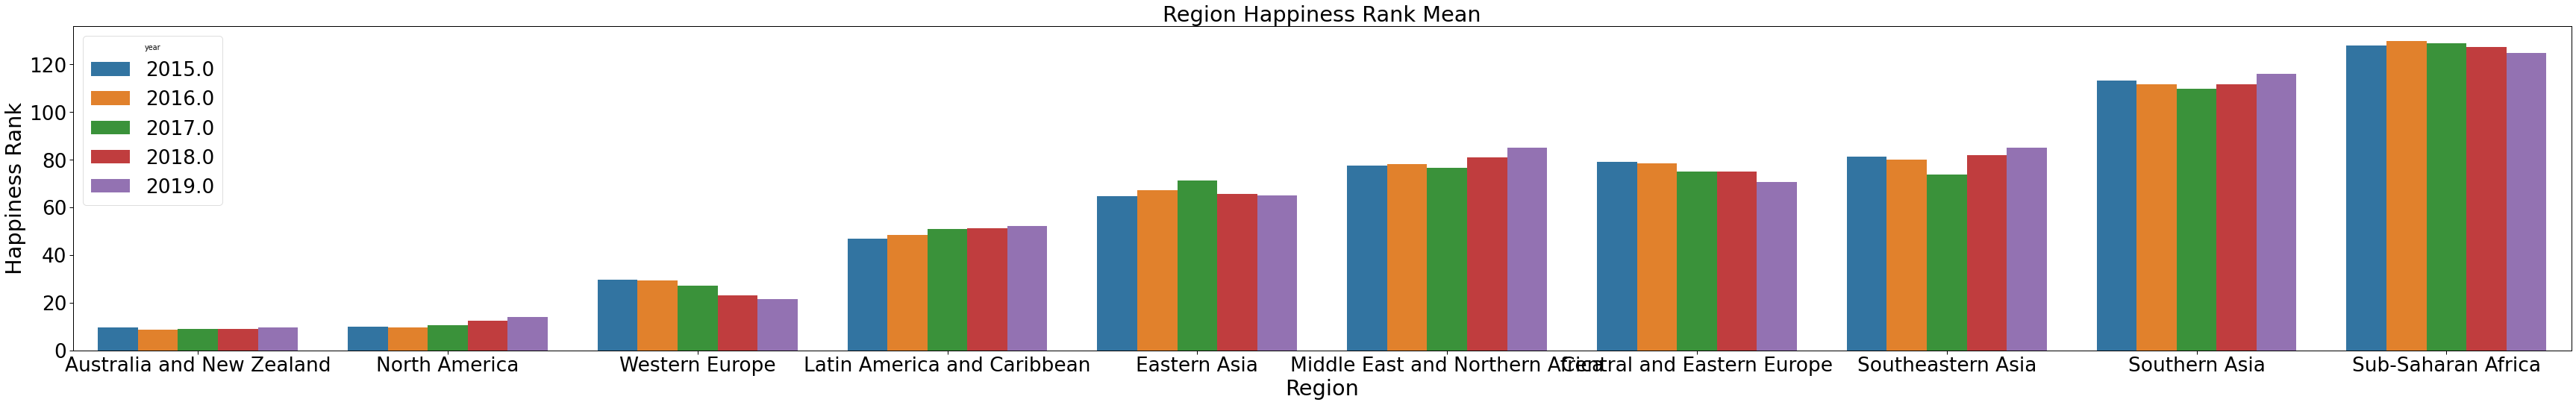

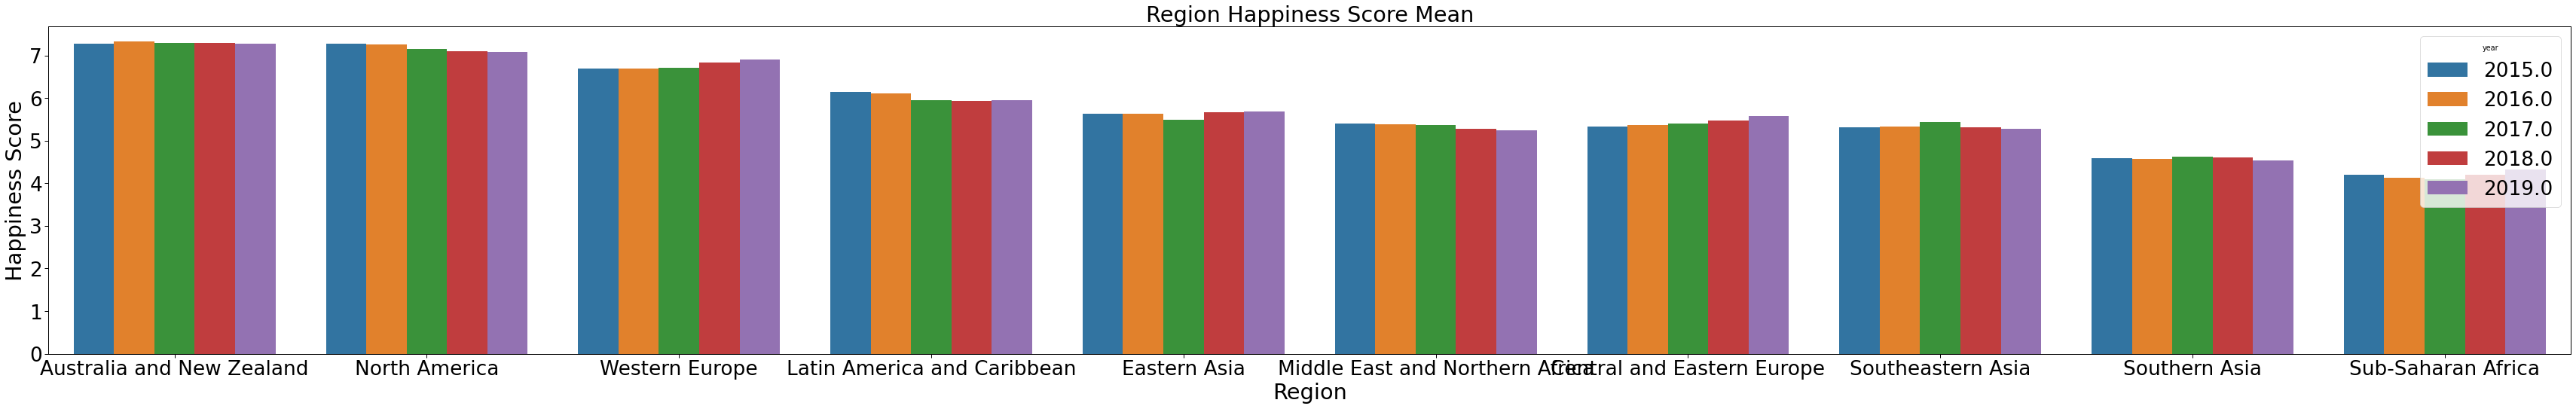

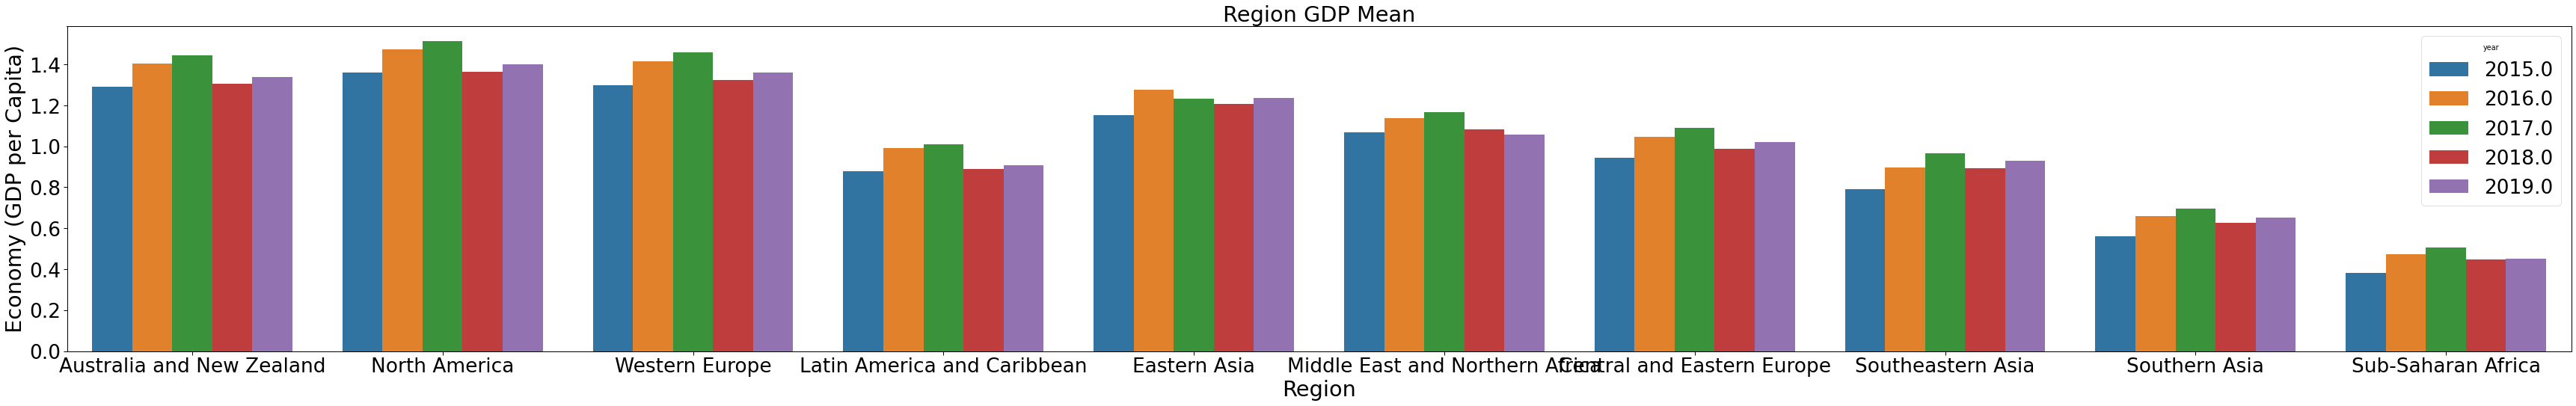

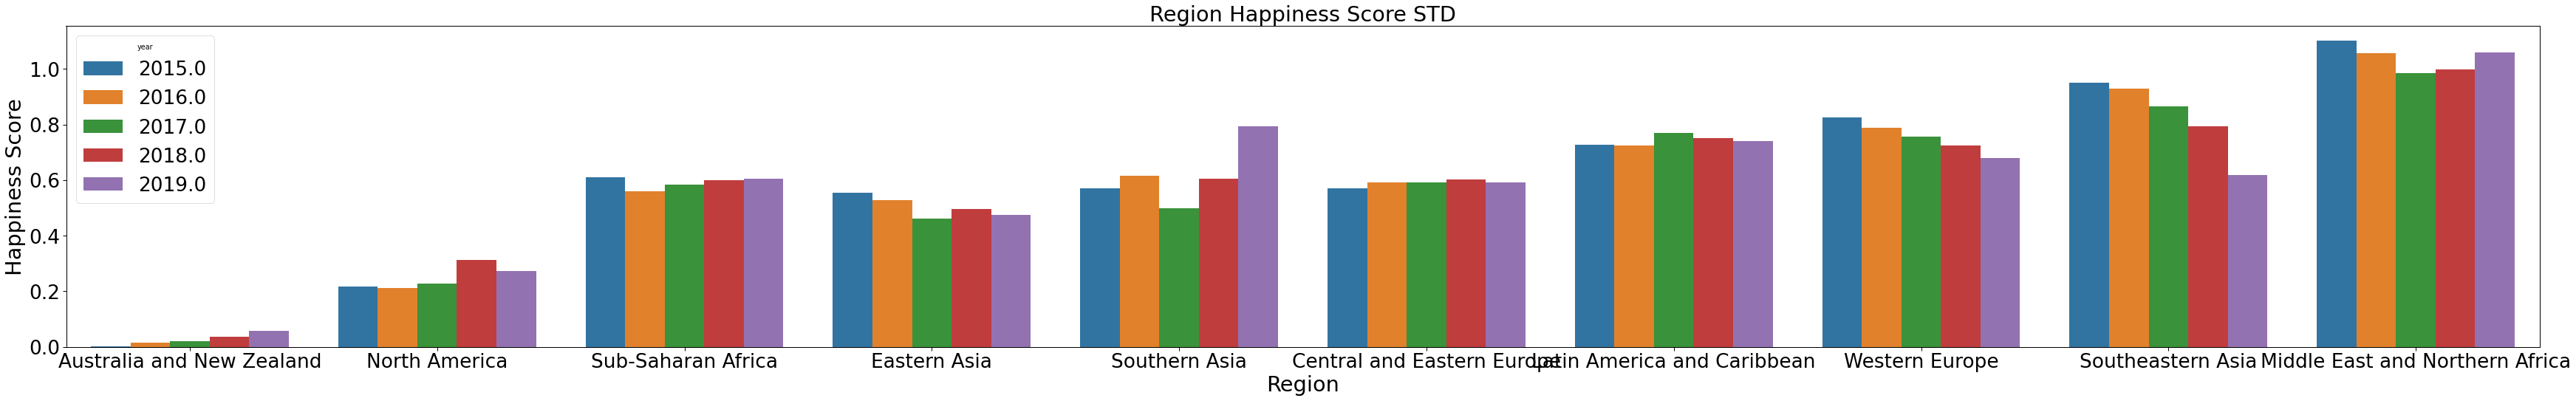

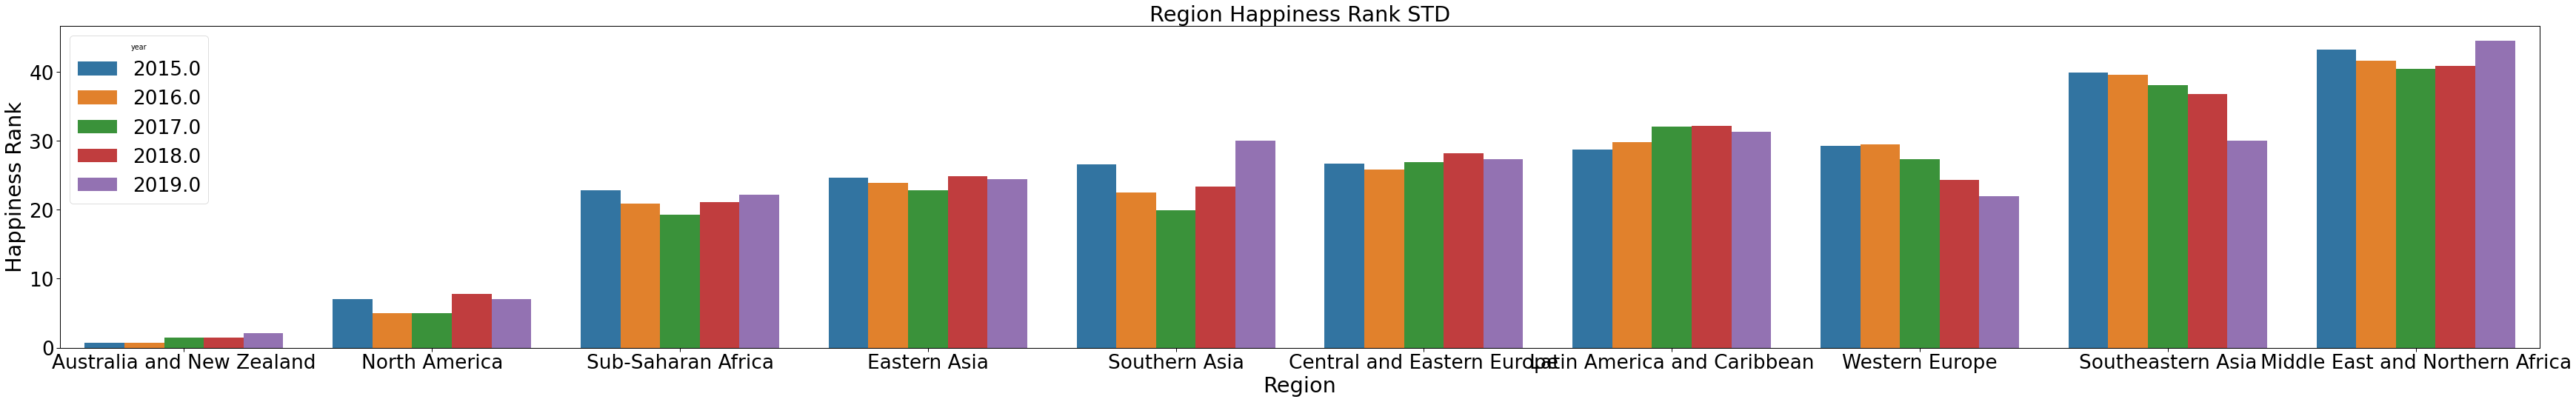

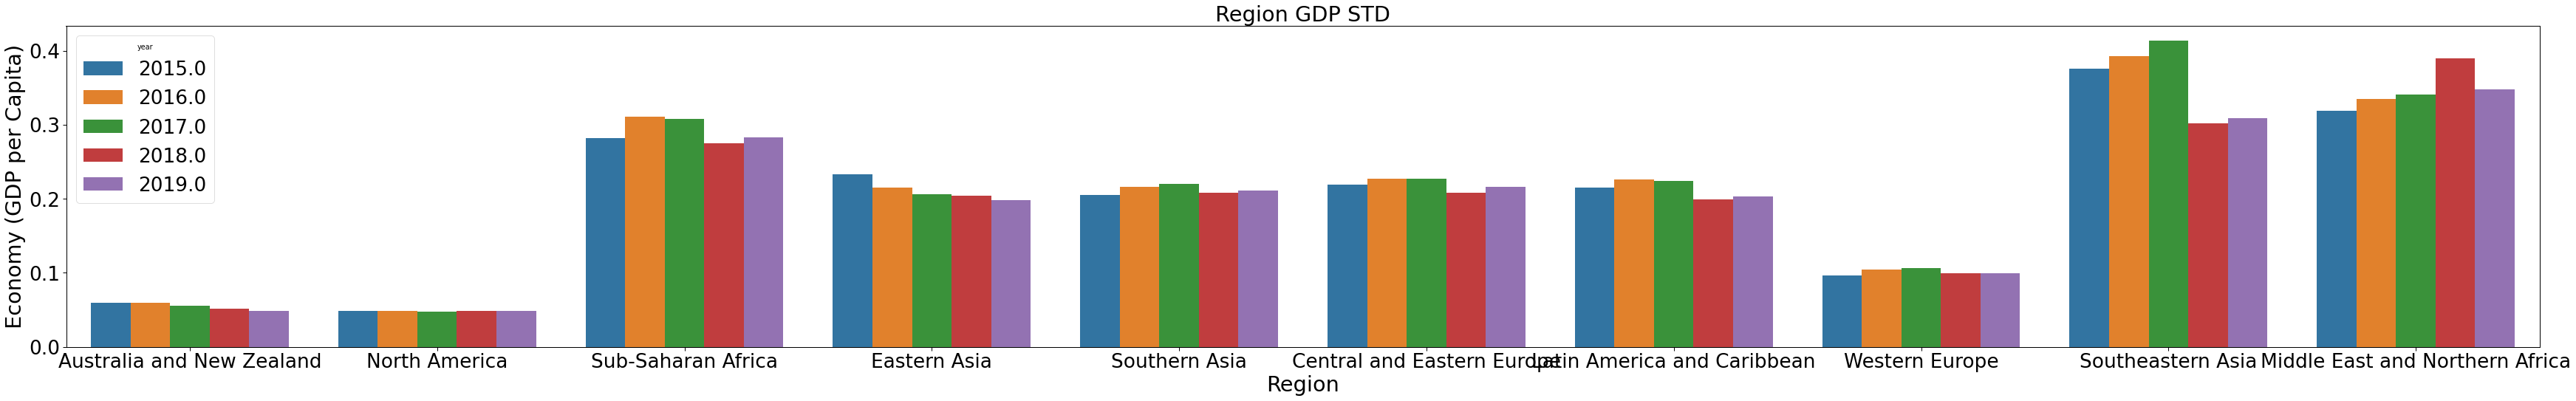

In [ ]:
'''
분석 결과 : 
몇몇 지역에서는 변동이 있었으나, 크게 변동된 지역은 
Min -> Sub-Saharan Africa와 Max -> Western Europe 두 지역이다.
'''

'''
2. 과연 가장 급격하게 성장한 나라는 어디일까? 
   행복지수와 GDP의 상관관계
'''

sort_all_mean = []
sort_all_std =[]

for i in range(len(file_all)) : 
  sort_mean=file_all[i].sort_values(by = 'Economy (GDP per Capita)',ascending = False).groupby('Region').mean().sort_values(by = 'Happiness Rank')
  sort_std=file_all[i].sort_values(by = 'Economy (GDP per Capita)',ascending = False).groupby('Region').std().sort_values(by = 'Happiness Rank')
  sort_all_mean.append(sort_mean[['Happiness Rank','Happiness Score','Economy (GDP per Capita)','year']])
  sort_std['year'].loc[:] = 2015+i
  sort_all_std.append(sort_std[['Happiness Rank','Happiness Score','Economy (GDP per Capita)','year']])

mean_all = pd.concat(sort_all_mean,axis = 0)
std_all = pd.concat(sort_all_std,axis = 0)

mean_all['number'] = np.arange(len(mean_all))
mean_all = mean_all.reset_index()

std_all['number'] = np.arange(len(std_all))
std_all =std_all.reset_index()

sns.set_context("paper", font_scale=3) 

plt.figure(figsize = (60,8))
sns.barplot(x='Region',y='Happiness Rank',hue = 'year',data = mean_all)
plt.title('Region Happiness Rank Mean')
plt.show()

plt.figure(figsize = (60,8))
sns.barplot(x='Region',y='Happiness Score',hue = 'year',data = mean_all)
plt.title('Region Happiness Score Mean')
plt.show()

plt.figure(figsize = (60,8))
sns.barplot(x='Region',y='Economy (GDP per Capita)',hue = 'year',data = mean_all)
plt.title('Region GDP Mean')
plt.show()

plt.figure(figsize = (60,8))
sns.barplot(x='Region',y='Happiness Score',hue = 'year',data = std_all)
plt.title('Region Happiness Score STD')
plt.show()

plt.figure(figsize = (60,8))
sns.barplot(x='Region',y='Happiness Rank',hue = 'year',data = std_all)
plt.title('Region Happiness Rank STD')
plt.show()

plt.figure(figsize = (60,8))
sns.barplot(x='Region',y='Economy (GDP per Capita)',hue = 'year',data = std_all)
plt.title('Region GDP STD')
plt.show()


North America


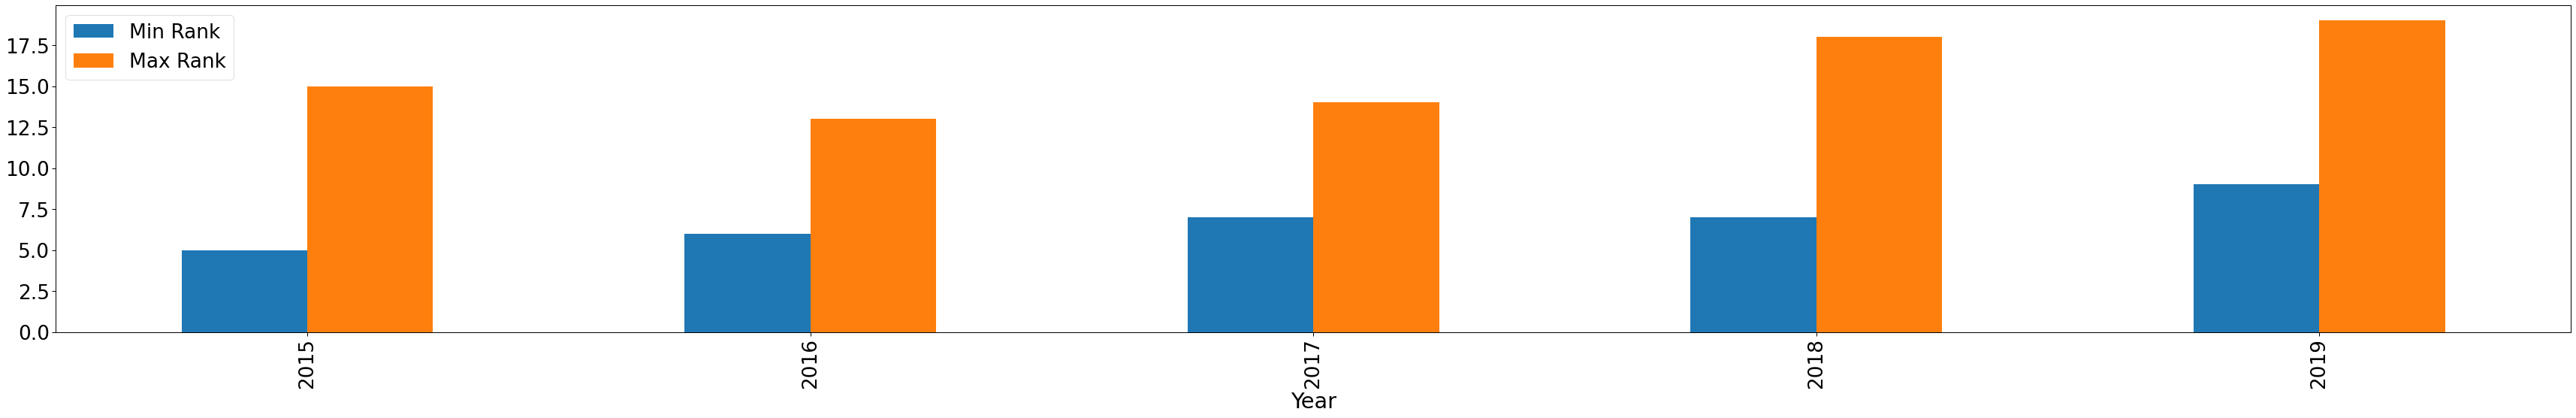

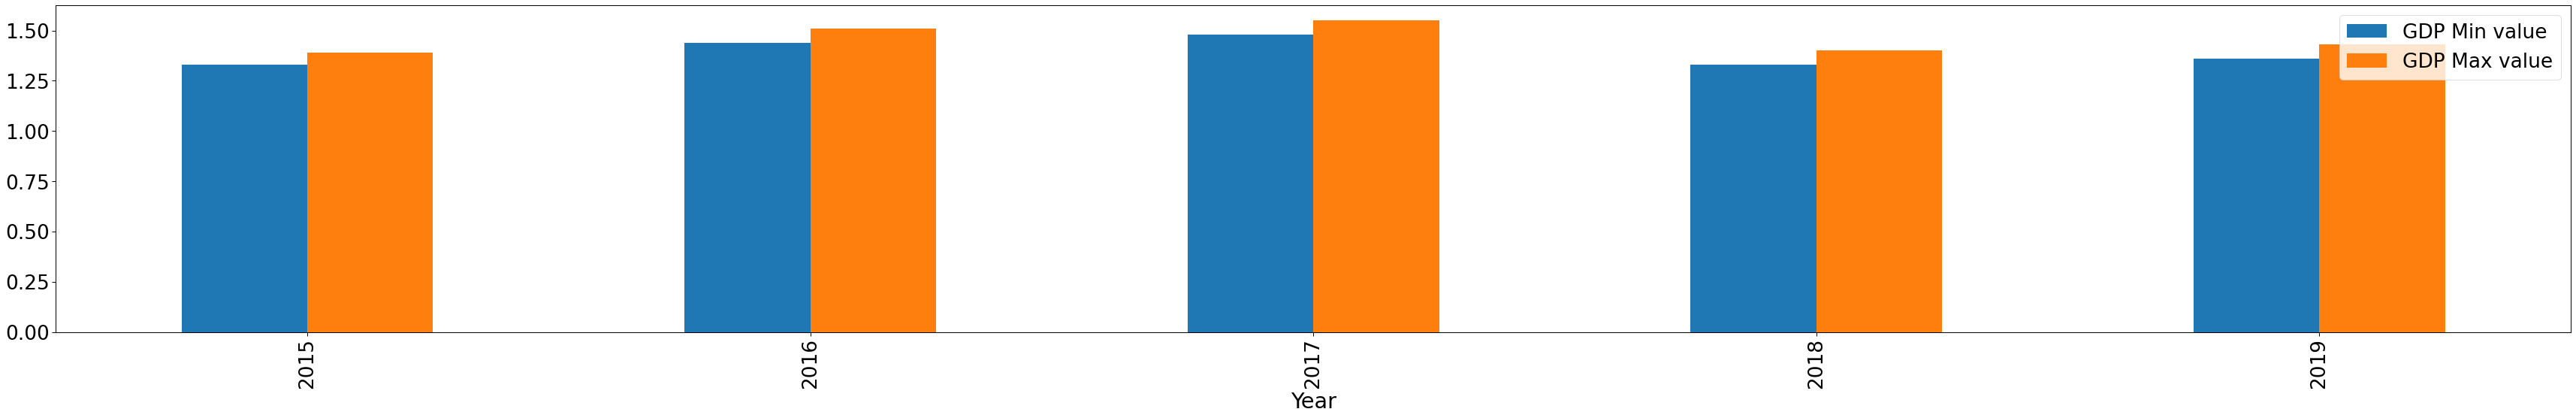

Latin America and Caribbean


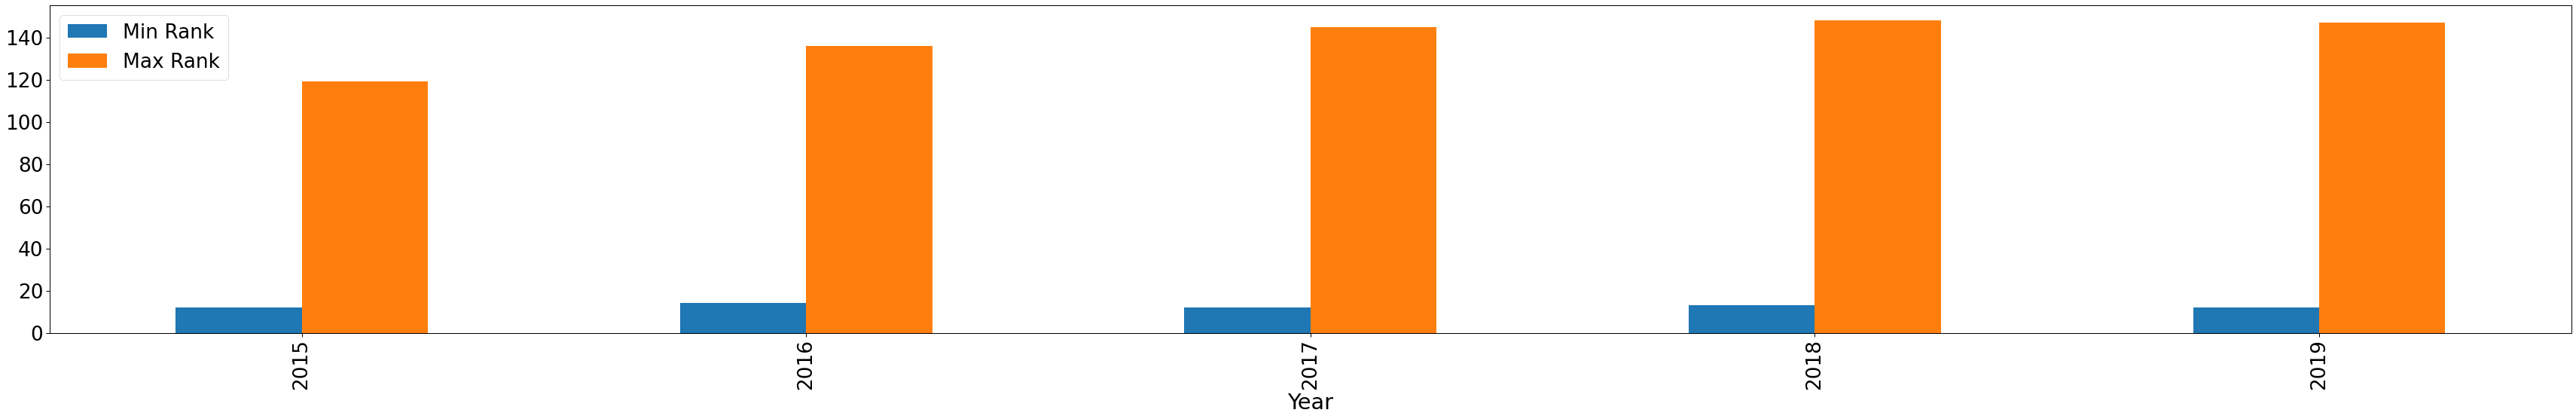

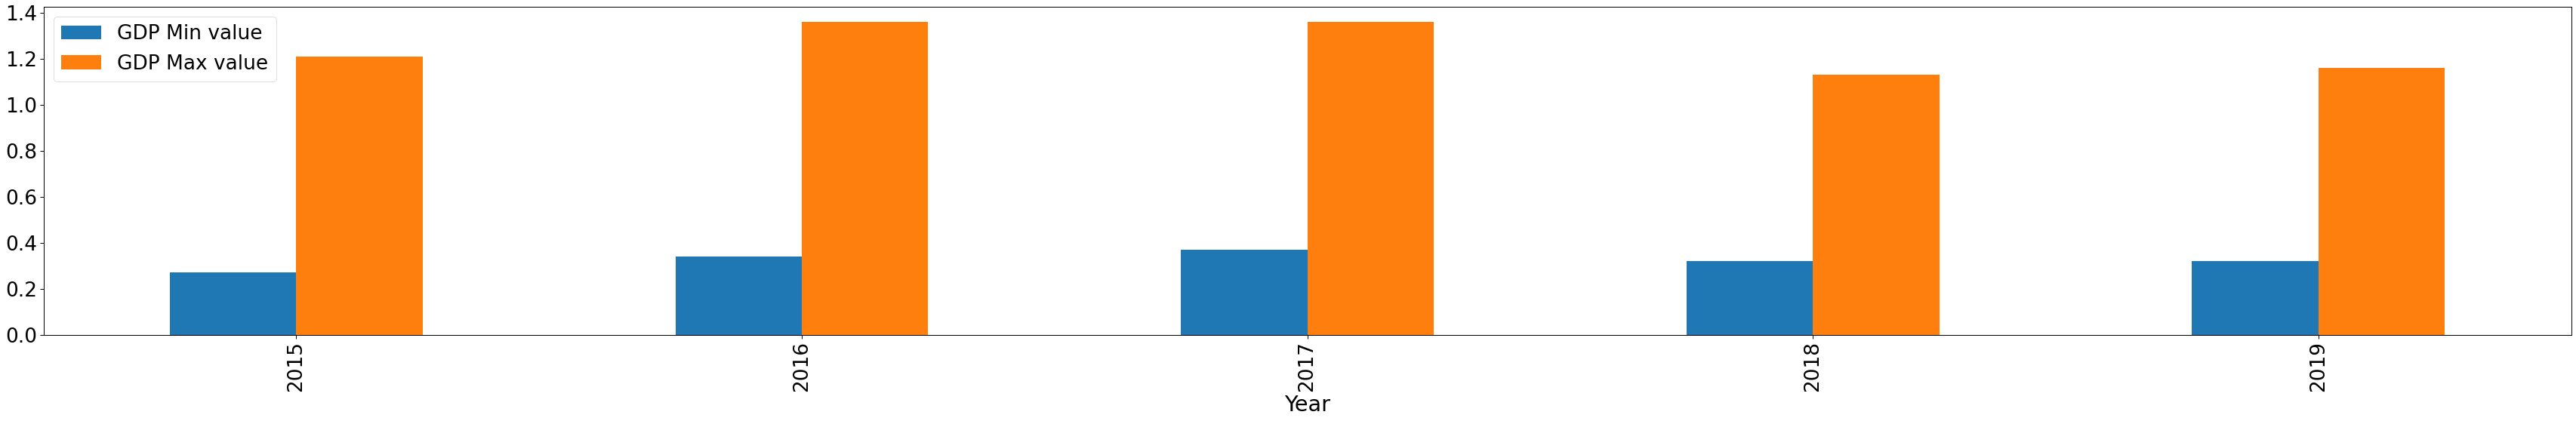

Middle East and Northern Africa


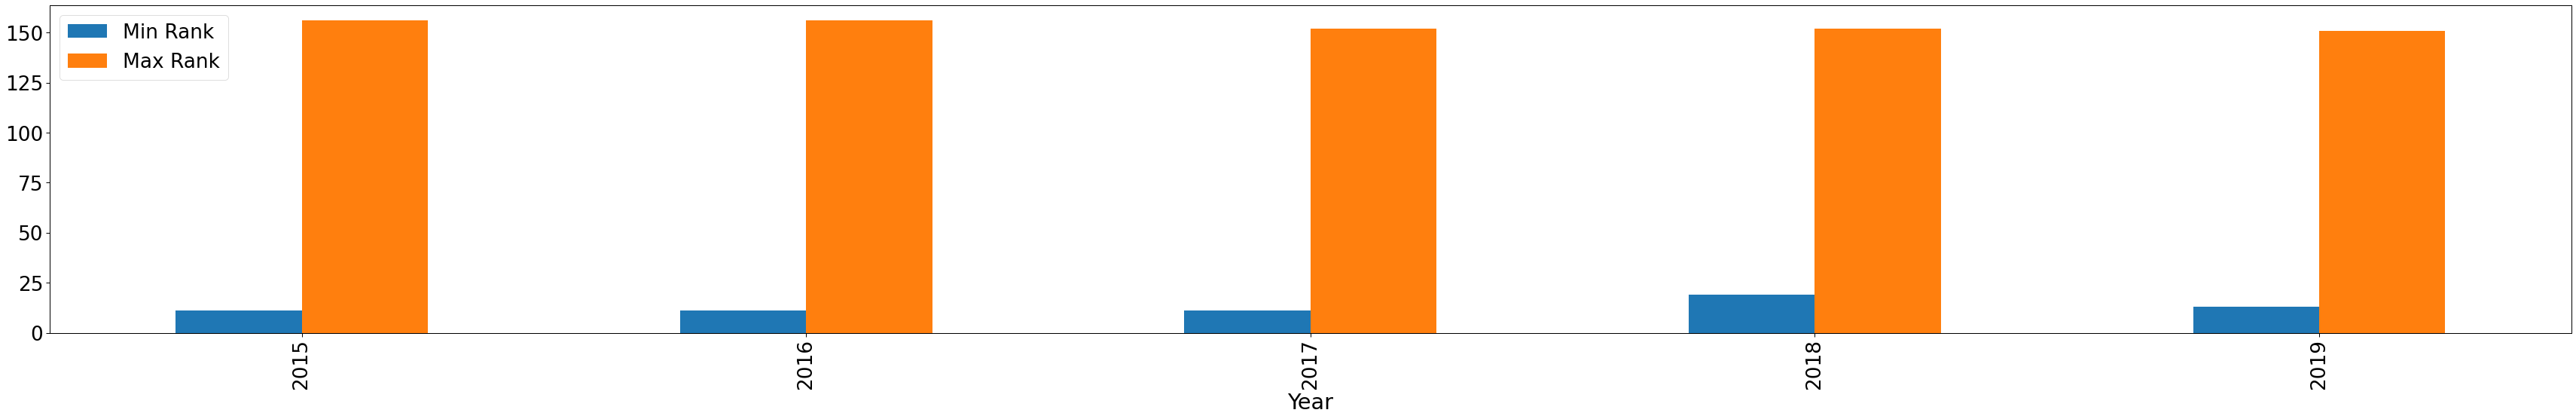

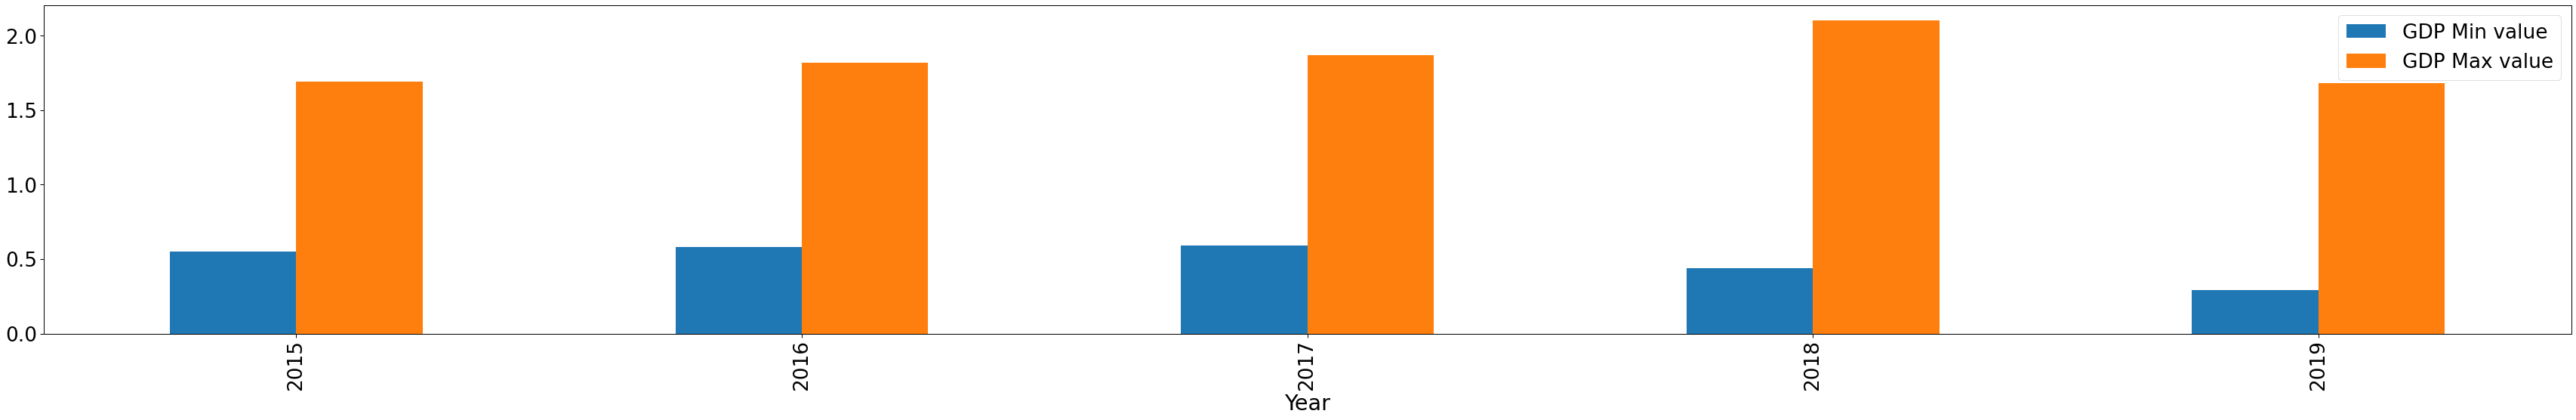

In [ ]:
'''
연도별로 행복 지수 및 순위와 GDP 평균을 내어 통계를 내 본 결과, 소득이 높을수록 행복지수가 보편적으로 높았다

하지만 특이 케이스로 Latin America and Caribbean의 GDP가 상대적으로 낮음에도 불구하고 행복 순위가 높았다

Western Europe의 GDP는 표준편차가 작지만 지역별 평균 GDP에서 상위권인 것으로 보아 전반적으로 GDP가 높은 지역이다

또한,Middle East and Northern Africa 를 보았을 떄 , 중간순위이지만 표준편차가 심하다 

이를 통해 궁금증이 생겨 해당 지역을 찾아보았다.
'''
''' 
North America                   : 표준편차가 전반적으로 가장 작은 값을 가지는 지역 
Latin America and Caribbean     : GDP 대비 행복지수가 높은 지역
Middle East and Northern Africa : 가장 표준편차가 큰 지역
에 대한 데이터 시각화
'''

print('North America')
LAC =[]
for i in range(len(file_all)) : 
  sort_mean=file_all[i][file_all[i]['Region']=='North America']
  LAC.append([2015+i,sort_mean[sort_mean['Happiness Rank']==sort_mean['Happiness Rank'].min()]['Country'].item(),sort_mean['Happiness Rank'].min(),sort_mean[sort_mean['Happiness Rank']==sort_mean['Happiness Rank'].max()]['Country'].item(),sort_mean['Happiness Rank'].max(),sort_mean[sort_mean['Economy (GDP per Capita)']==sort_mean['Economy (GDP per Capita)'].min()]['Country'].item(),round(sort_mean['Economy (GDP per Capita)'].min(),2),sort_mean[sort_mean['Economy (GDP per Capita)']==sort_mean['Economy (GDP per Capita)'].max()]['Country'].item(),round(sort_mean['Economy (GDP per Capita)'].max(),2)])

LAC = pd.DataFrame(LAC,columns=['Year','Min Country','Min Rank','Max Country','Max Rank','GDP Min Country','GDP Min value','GDP Max Country','GDP Max value'])
LAC.head()


LAC = LAC.set_index('Year')
LAC.plot(kind = 'bar',y=['Min Rank','Max Rank'],figsize = (60,8))
plt.show()
LAC.plot(kind = 'bar',y=['GDP Min value','GDP Max value'],figsize = (60,8))

plt.show()

print('Latin America and Caribbean')
LAC =[]
for i in range(len(file_all)) : 
  sort_mean=file_all[i][file_all[i]['Region']=='Latin America and Caribbean']
  LAC.append([2015+i,sort_mean[sort_mean['Happiness Rank']==sort_mean['Happiness Rank'].min()]['Country'].item(),sort_mean['Happiness Rank'].min(),sort_mean[sort_mean['Happiness Rank']==sort_mean['Happiness Rank'].max()]['Country'].item(),sort_mean['Happiness Rank'].max(),sort_mean[sort_mean['Economy (GDP per Capita)']==sort_mean['Economy (GDP per Capita)'].min()]['Country'].item(),round(sort_mean['Economy (GDP per Capita)'].min(),2),sort_mean[sort_mean['Economy (GDP per Capita)']==sort_mean['Economy (GDP per Capita)'].max()]['Country'].item(),round(sort_mean['Economy (GDP per Capita)'].max(),2)])

LAC = pd.DataFrame(LAC,columns=['Year','Min Country','Min Rank','Max Country','Max Rank','GDP Min Country','GDP Min value','GDP Max Country','GDP Max value'])
LAC.head()


LAC = LAC.set_index('Year')
LAC.plot(kind = 'bar',y=['Min Rank','Max Rank'],figsize = (60,8))
plt.show()
LAC.plot(kind = 'bar',y=['GDP Min value','GDP Max value'],figsize = (60,8))
d
plt.show()



print('Middle East and Northern Africa')
LAC =[]
for i in range(len(file_all)) : 
  sort_mean=file_all[i][file_all[i]['Region']=='Middle East and Northern Africa']
  LAC.append([2015+i,sort_mean[sort_mean['Happiness Rank']==sort_mean['Happiness Rank'].min()]['Country'].item(),sort_mean['Happiness Rank'].min(),sort_mean[sort_mean['Happiness Rank']==sort_mean['Happiness Rank'].max()]['Country'].item(),sort_mean['Happiness Rank'].max(),sort_mean[sort_mean['Economy (GDP per Capita)']==sort_mean['Economy (GDP per Capita)'].min()]['Country'].item(),round(sort_mean['Economy (GDP per Capita)'].min(),2),sort_mean[sort_mean['Economy (GDP per Capita)']==sort_mean['Economy (GDP per Capita)'].max()]['Country'].item(),round(sort_mean['Economy (GDP per Capita)'].max(),2)])

LAC = pd.DataFrame(LAC,columns=['Year','Min Country','Min Rank','Max Country','Max Rank','GDP Min Country','GDP Min value','GDP Max Country','GDP Max value'])
LAC.head()


LAC = LAC.set_index('Year')
LAC.plot(kind = 'bar',y=['Min Rank','Max Rank'],figsize = (60,8))
plt.show()
LAC.plot(kind = 'bar',y=['GDP Min value','GDP Max value'],figsize = (60,8))

plt.show()



min_max scaling한 행복 수치 + GDP + Health + Generosity + Dystopia Residual 값의 합 기준 탑 5 정렬
             Happiness Rank     total  year
Country                                    
Denmark                   3  4.899312  2015
New Zealand               9  4.891390  2015
Qatar                    28  4.883561  2015
Switzerland               1  4.871655  2015
Sweden                    8  4.864468  2015


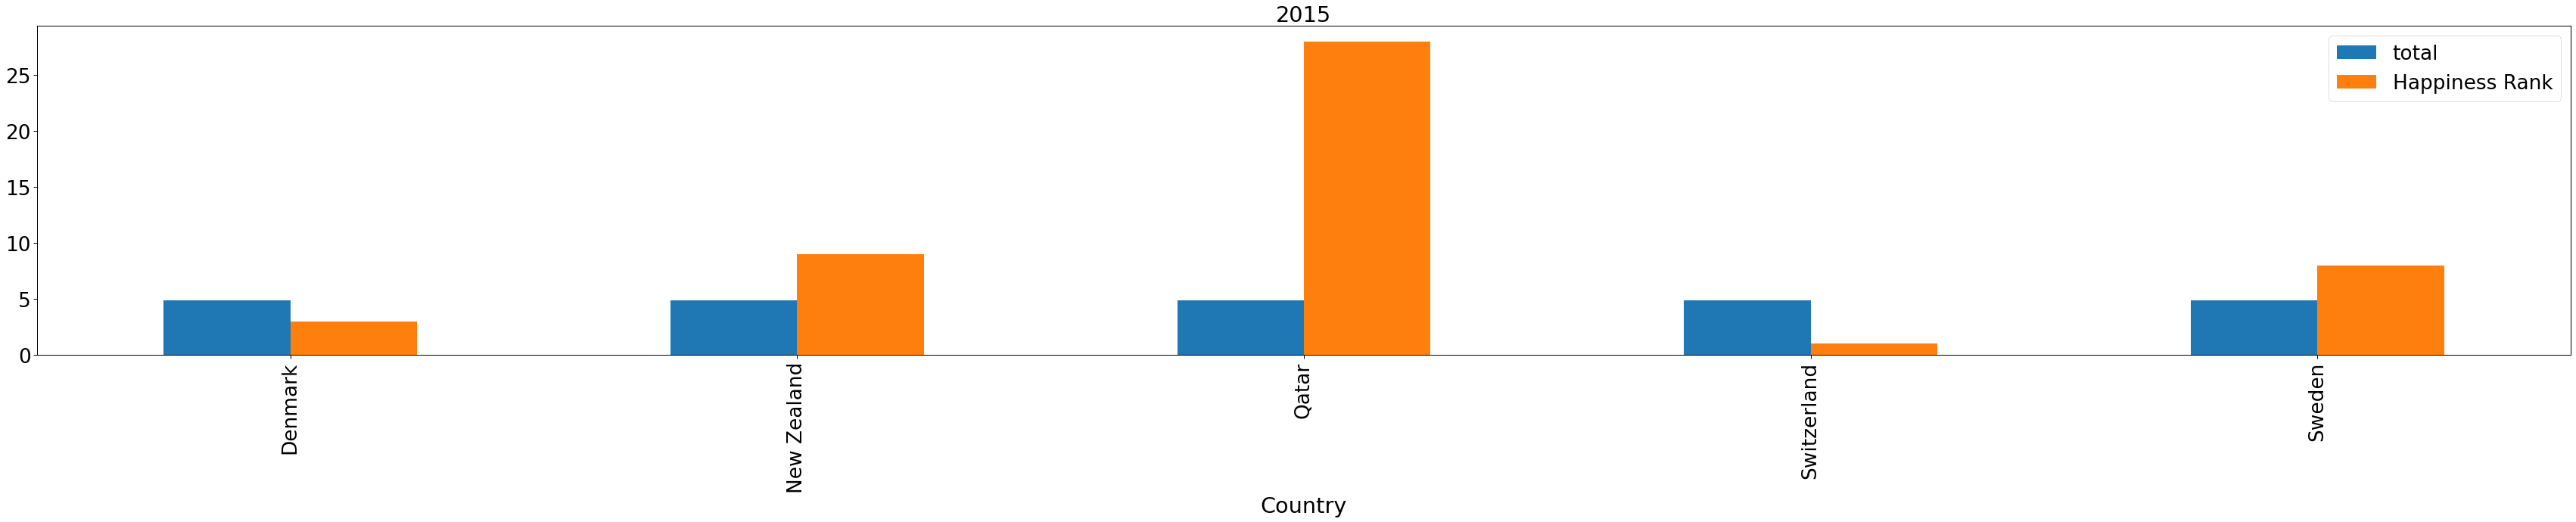

             Happiness Rank     total  year
Country                                    
New Zealand               8  4.964180  2016
Denmark                   1  4.898166  2016
Switzerland               2  4.859868  2016
Singapore                22  4.856415  2016
Sweden                   10  4.849756  2016


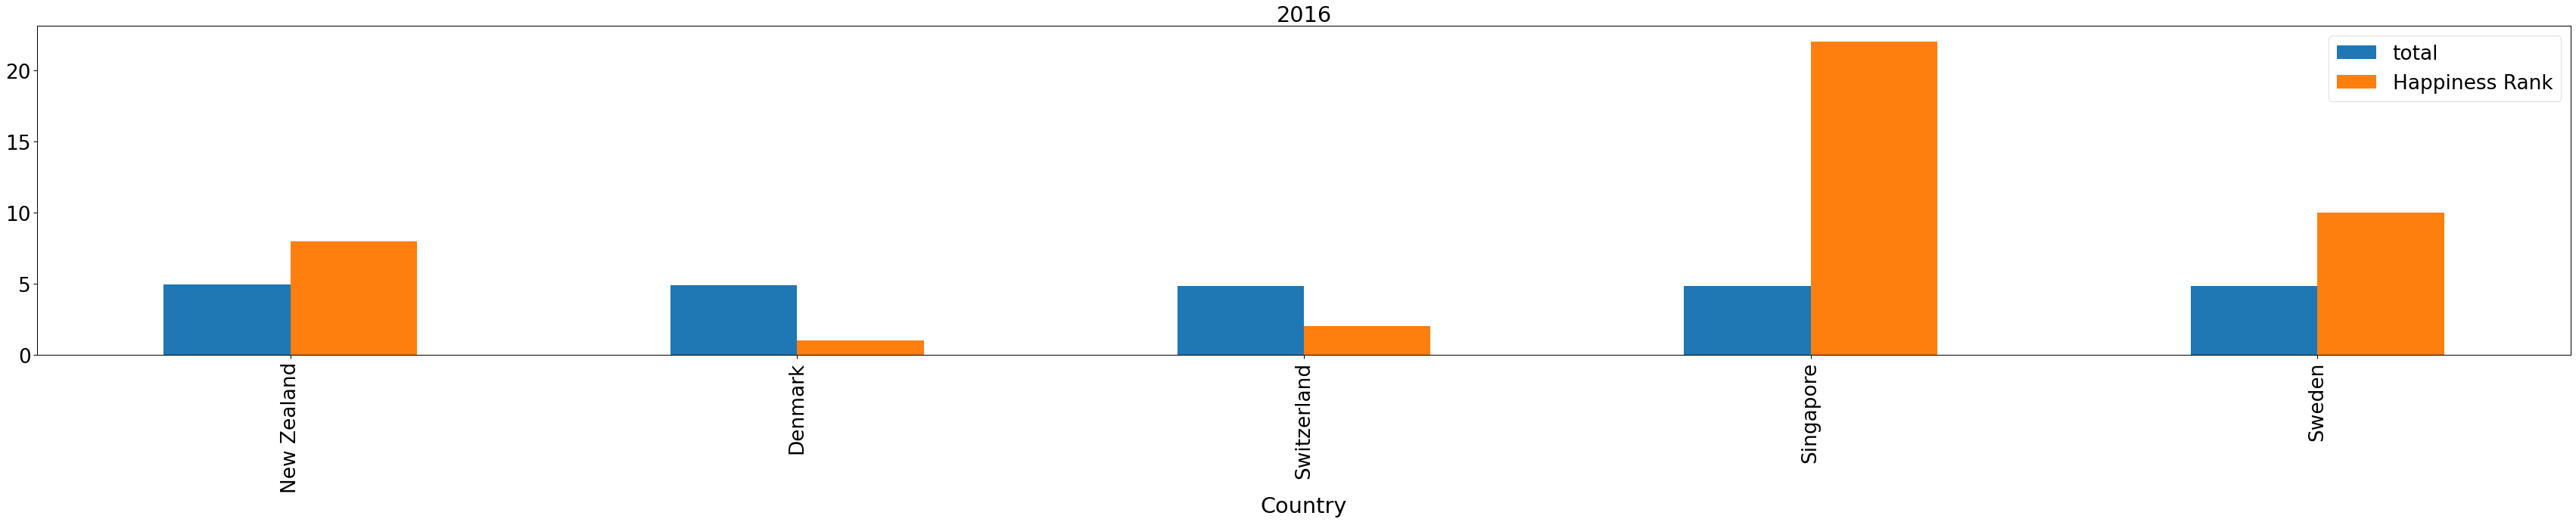

             Happiness Rank     total  year
Country                                    
Singapore                26  4.953494  2017
New Zealand               8  4.919550  2017
Denmark                   2  4.862122  2017
Sweden                    9  4.840556  2017
Switzerland               4  4.810574  2017


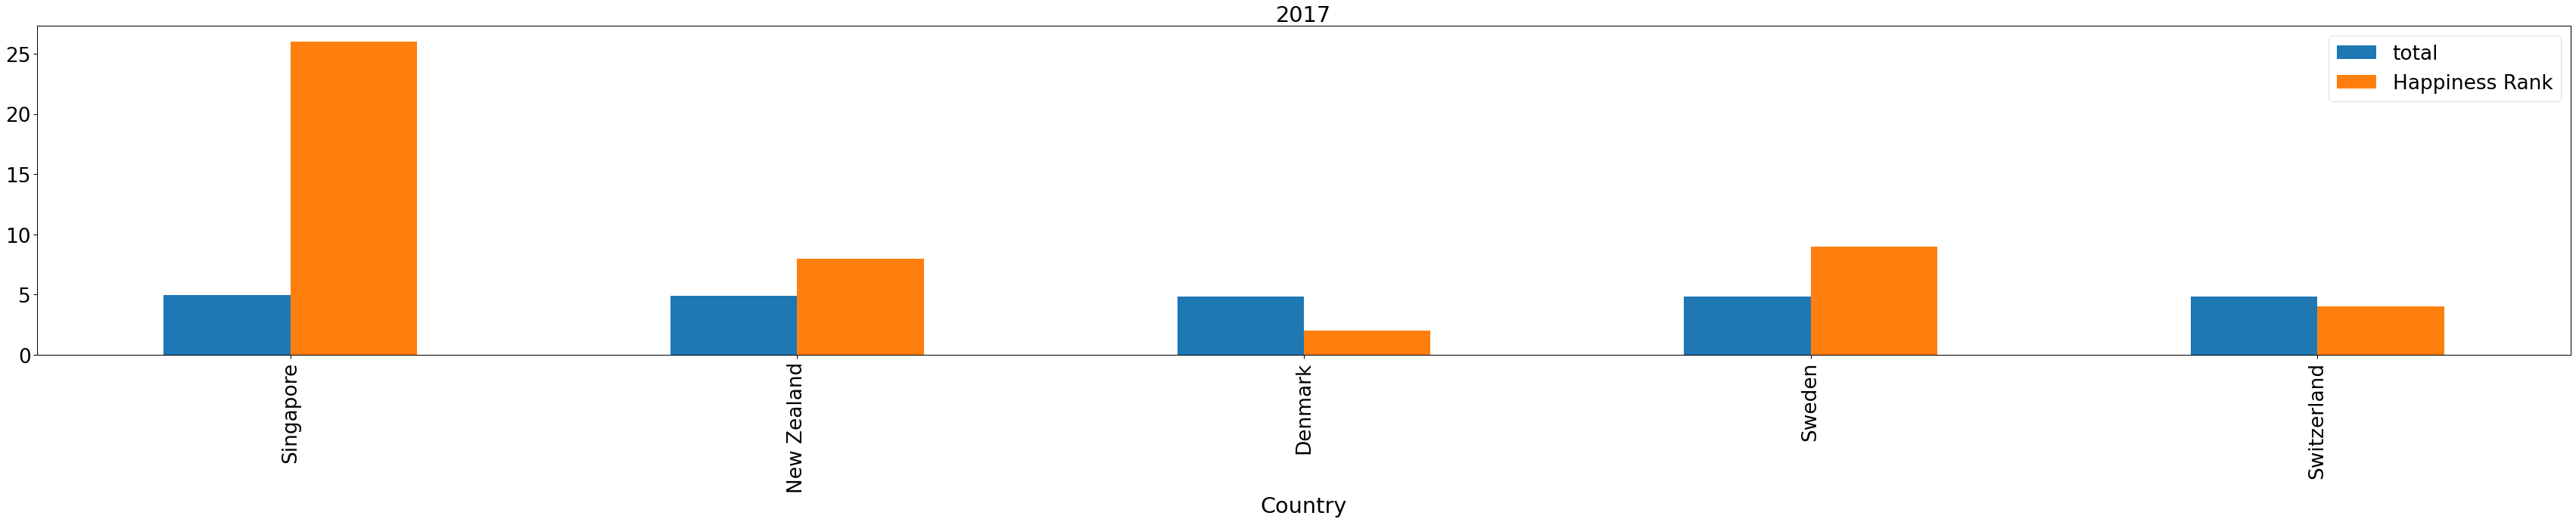

             Happiness Rank     total  year
Country                                    
Denmark                   3  4.782056  2018
New Zealand               8  4.775894  2018
Singapore                34  4.743439  2018
Norway                    2  4.692297  2018
Sweden                    9  4.690488  2018


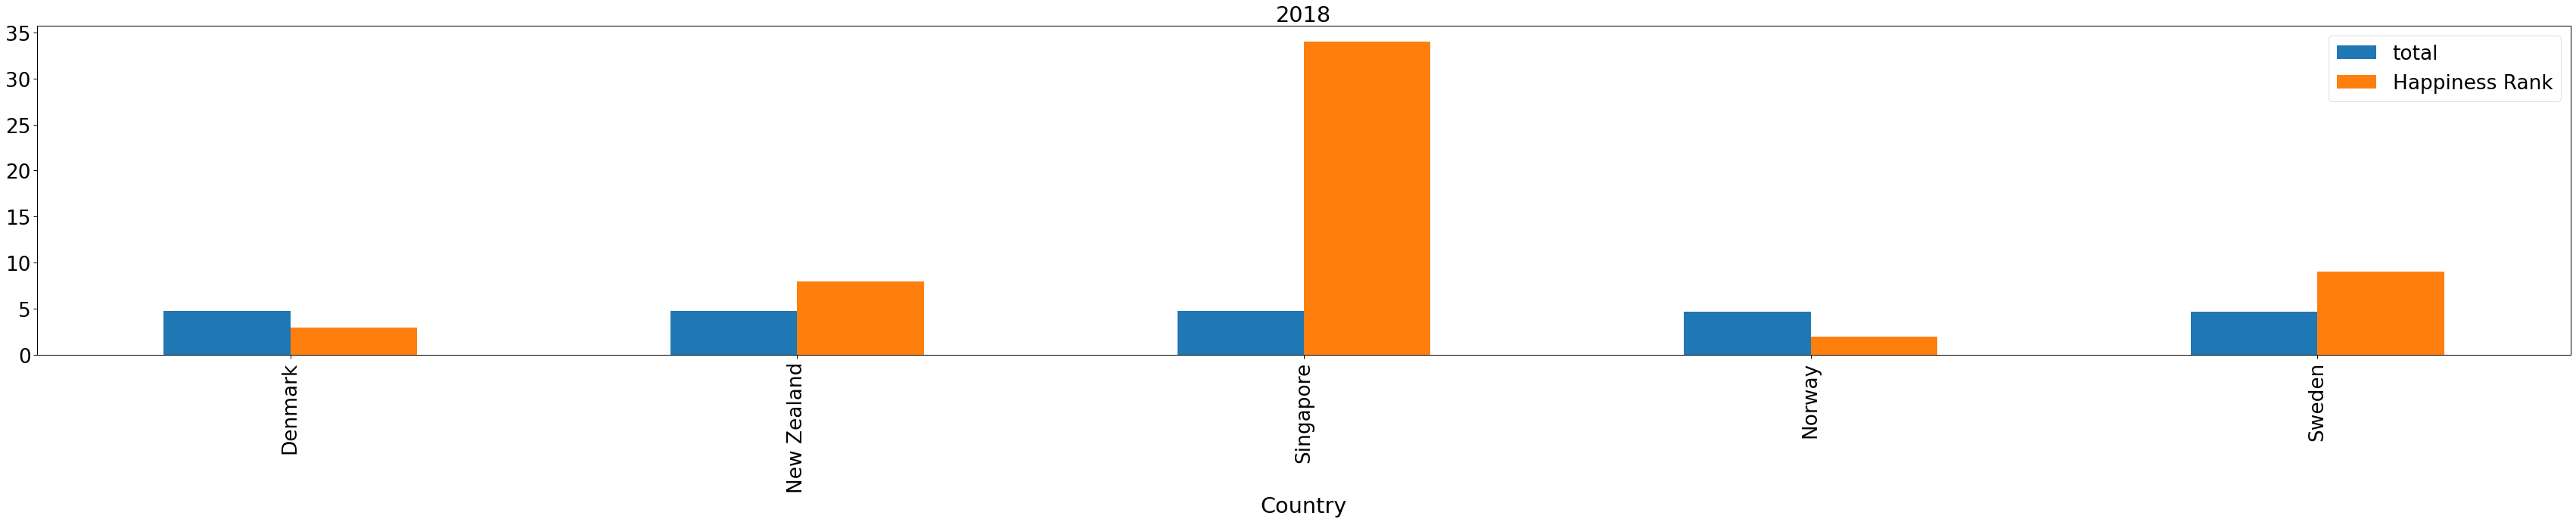

             Happiness Rank     total  year
Country                                    
Singapore                34  4.986881  2019
Denmark                   2  4.948300  2019
Norway                    3  4.928024  2019
New Zealand               8  4.927976  2019
Switzerland               6  4.853780  2019


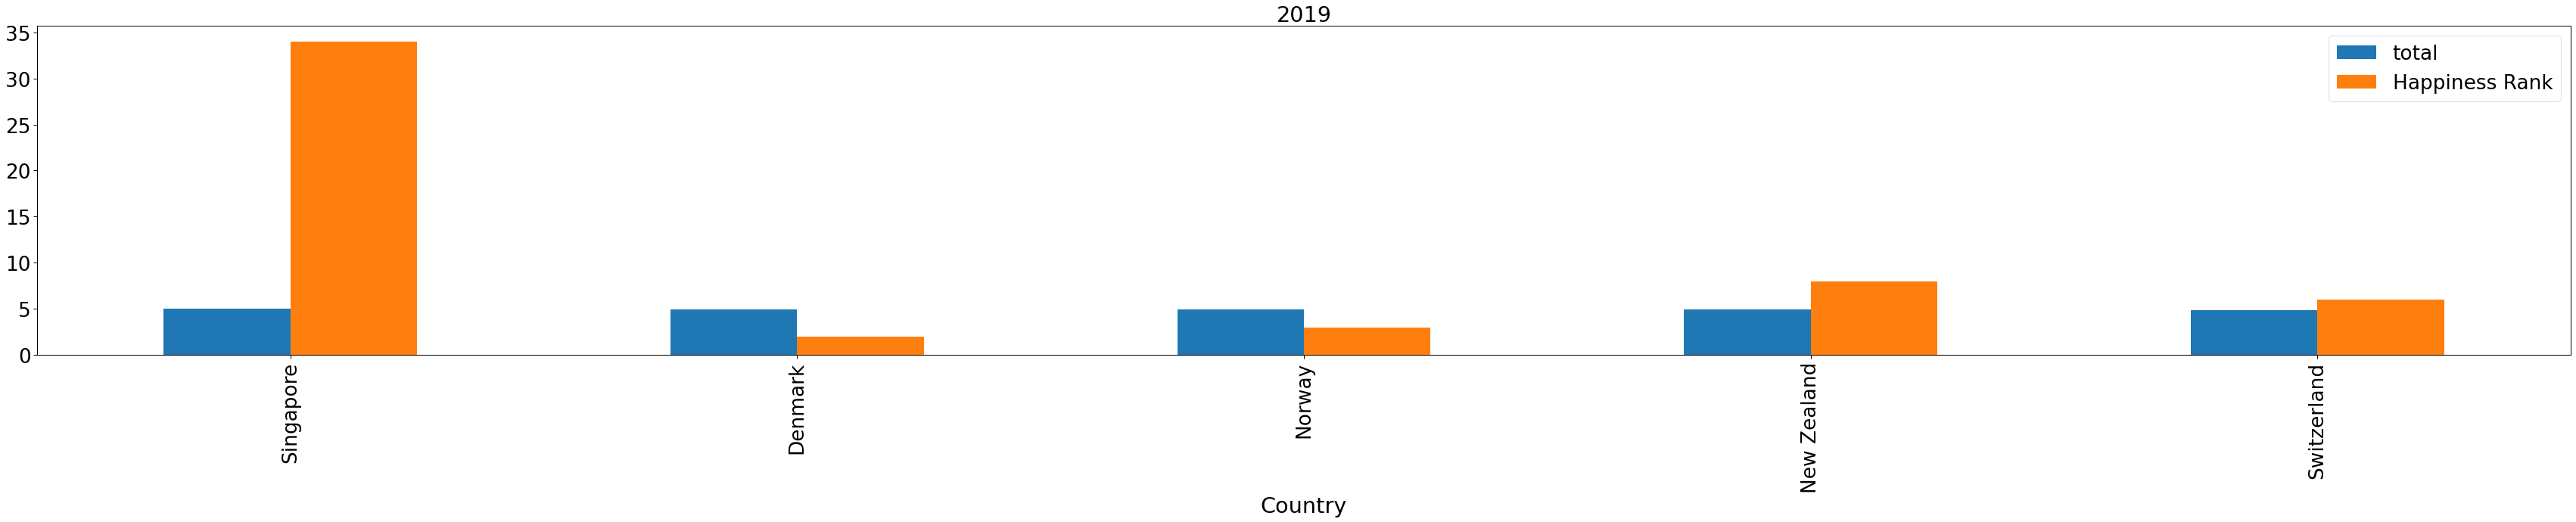

In [ ]:
'''
그 결과, 행복지수 빈익빈 부익부가 컸으며, GDP 또한 나라마다 크게 다른 것을 알 수 있다.
'''

print('min_max scaling한 행복 수치 + GDP + Health + Generosity + Dystopia Residual 값의 합 기준 탑 5 정렬')

for i in range(len(file_all)) :
  temp_file = file_all[i].copy(deep='True') 
  scaling = feture_scaling(temp_file,column =['Happiness Rank','Economy (GDP per Capita)', 'Happiness Score','Health (Life Expectancy)','Generosity','Freedom','Trust (Government Corruption)'])
  file_all[i]['total']=scaling['Happiness Score']+scaling['Economy (GDP per Capita)']+scaling['Health (Life Expectancy)']+scaling['Generosity']+scaling['Freedom']+scaling['Trust (Government Corruption)']    
  all_scaling = file_all[i].sort_values(by = 'total',ascending = False).head(5)[['Country', 'Happiness Rank','total','year']]
  all_scaling = all_scaling.set_index('Country')
  print(all_scaling.head())
  all_scaling.plot(kind = 'bar',y=['total','Happiness Rank'],figsize=(60,8))
  plt.title(2015+i)
  plt.show()


min_max scaling한 행복 수치 + GDP + Health + Generosity + Dystopia Residual 값의 합 기준 탑 5 정렬
                                Region  Happiness Rank  Economy (GDP per Capita)  Happiness Score  Health (Life Expectancy)  Generosity  Freedom  Trust (Government Corruption)  Dystopia Residual     total  year
Country                                                                                                                                                                                                           
Denmark                 Western Europe               3                   1.32548            7.527                   0.87464     0.34139  0.64938                        0.48357            2.49204  5.560201  2015
Switzerland             Western Europe               1                   1.39651            7.587                   0.94143     0.29678  0.66557                        0.41978            2.51738  5.540285  2015
Sweden                  Western Europe               8                

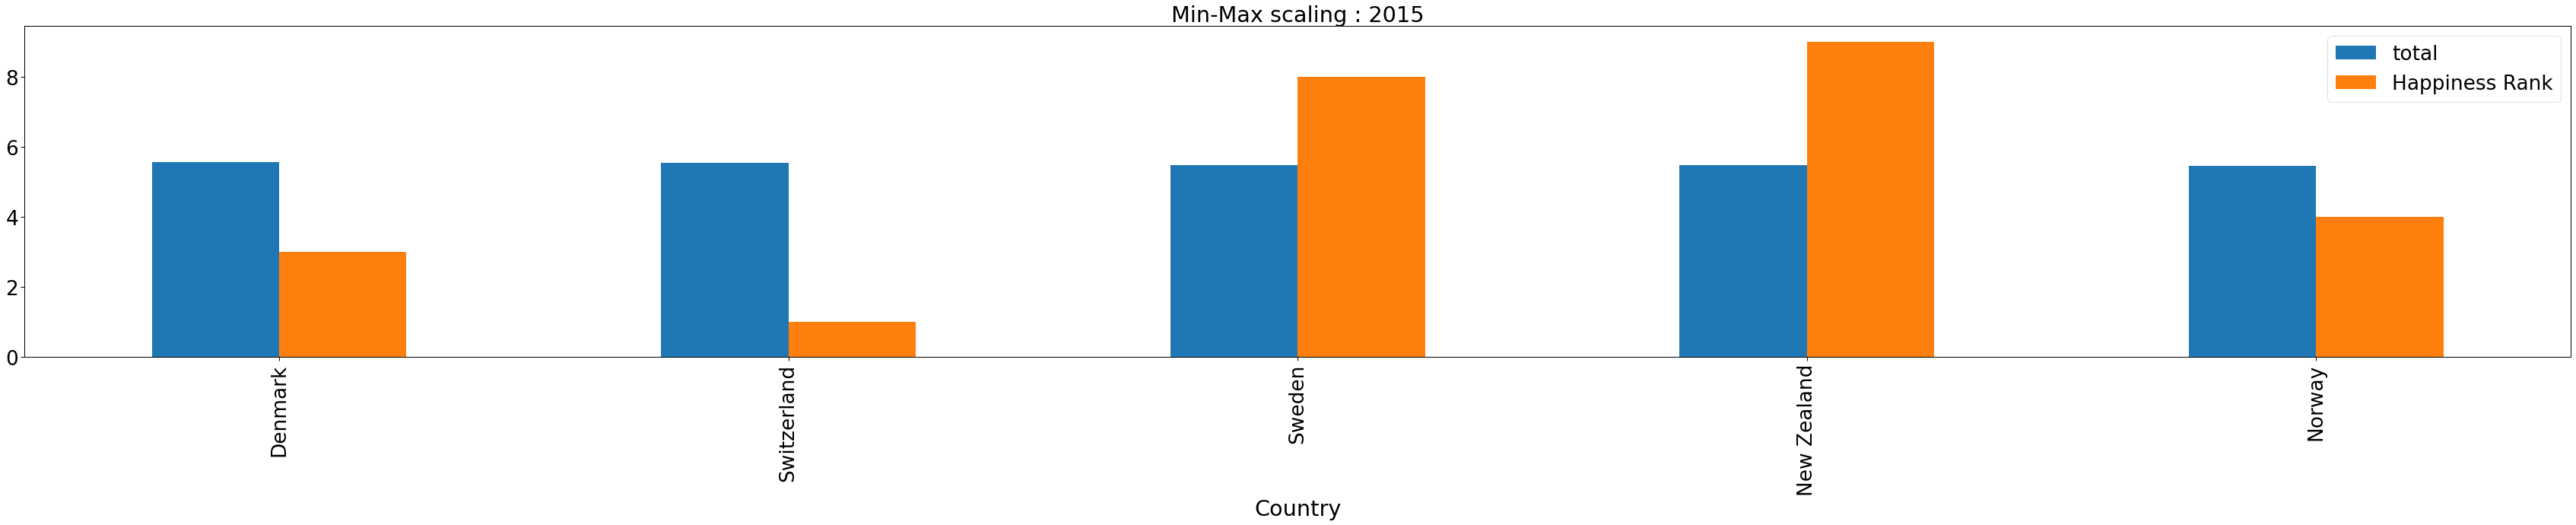

                                Region  Happiness Rank  Economy (GDP per Capita)  Happiness Score  Health (Life Expectancy)  Generosity  Freedom  Trust (Government Corruption)  Dystopia Residual     total  year
Country                                                                                                                                                                                                           
Denmark                 Western Europe               1                   1.44178            7.526                   0.79504     0.36171  0.57941                        0.44453            2.73939  5.534460  2016
New Zealand  Australia and New Zealand               8                   1.36066            7.334                   0.83096     0.49401  0.58147                        0.41904            2.47553  5.513098  2016
Switzerland             Western Europe               2                   1.52733            7.509                   0.86303     0.28083  0.58557            

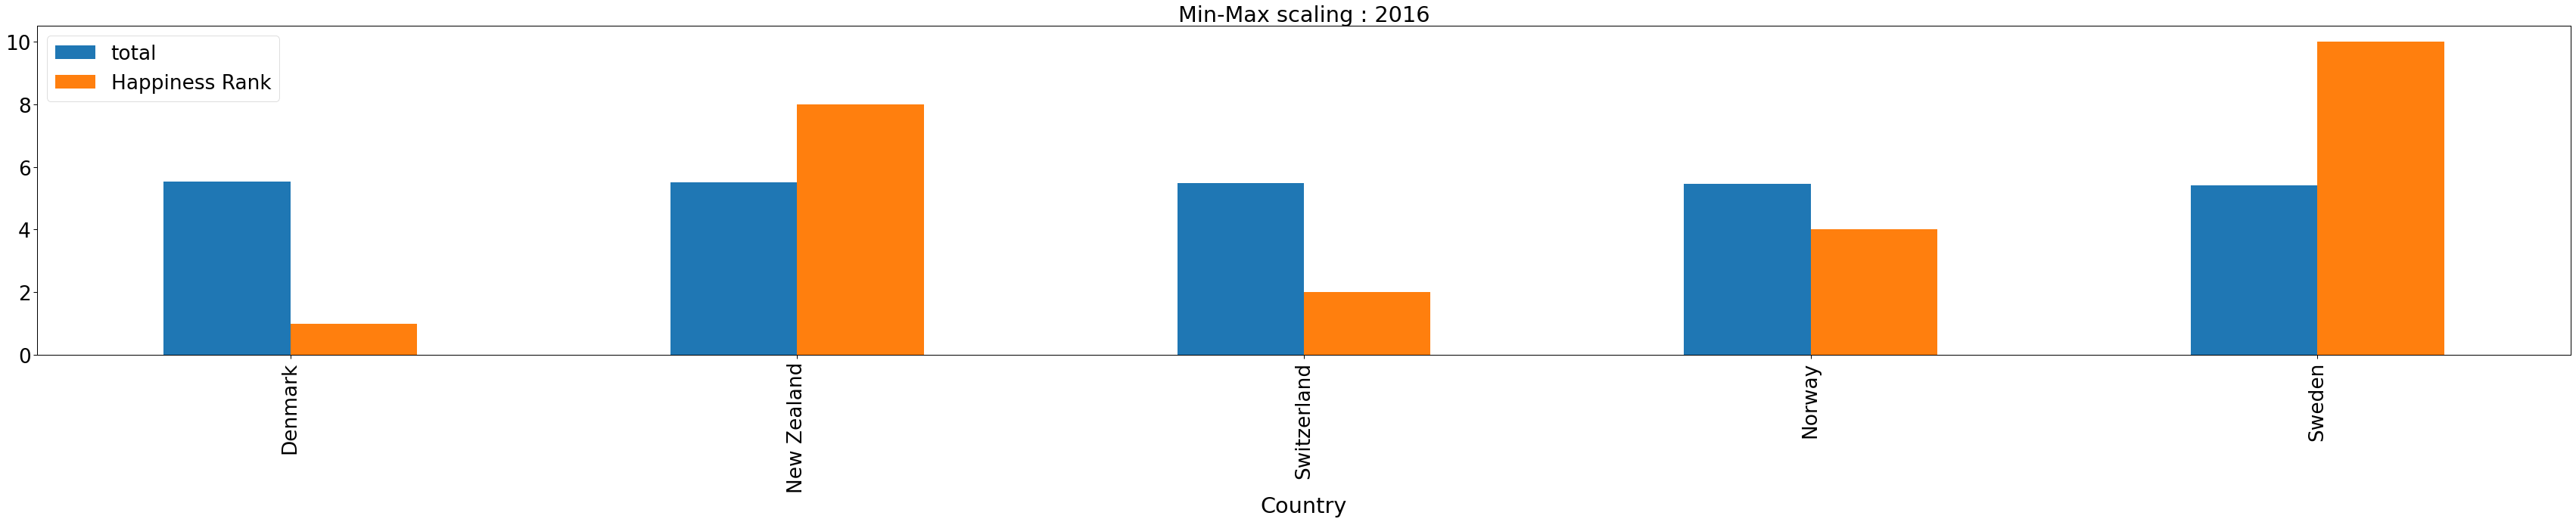

                                Region  Happiness Rank  Economy (GDP per Capita)  Happiness Score  Health (Life Expectancy)  Generosity   Freedom  Trust (Government Corruption)  Dystopia Residual     total  year
Country                                                                                                                                                                                                            
Denmark                 Western Europe               2                  1.482383            7.522                  0.792566    0.355280  0.626007                       0.400770           2.313707  5.568726  2017
New Zealand  Australia and New Zealand               8                  1.405706            7.314                  0.816760    0.500005  0.614062                       0.382817           2.046456  5.528603  2017
Switzerland             Western Europe               4                  1.564980            7.494                  0.858131    0.290549  0.620071       

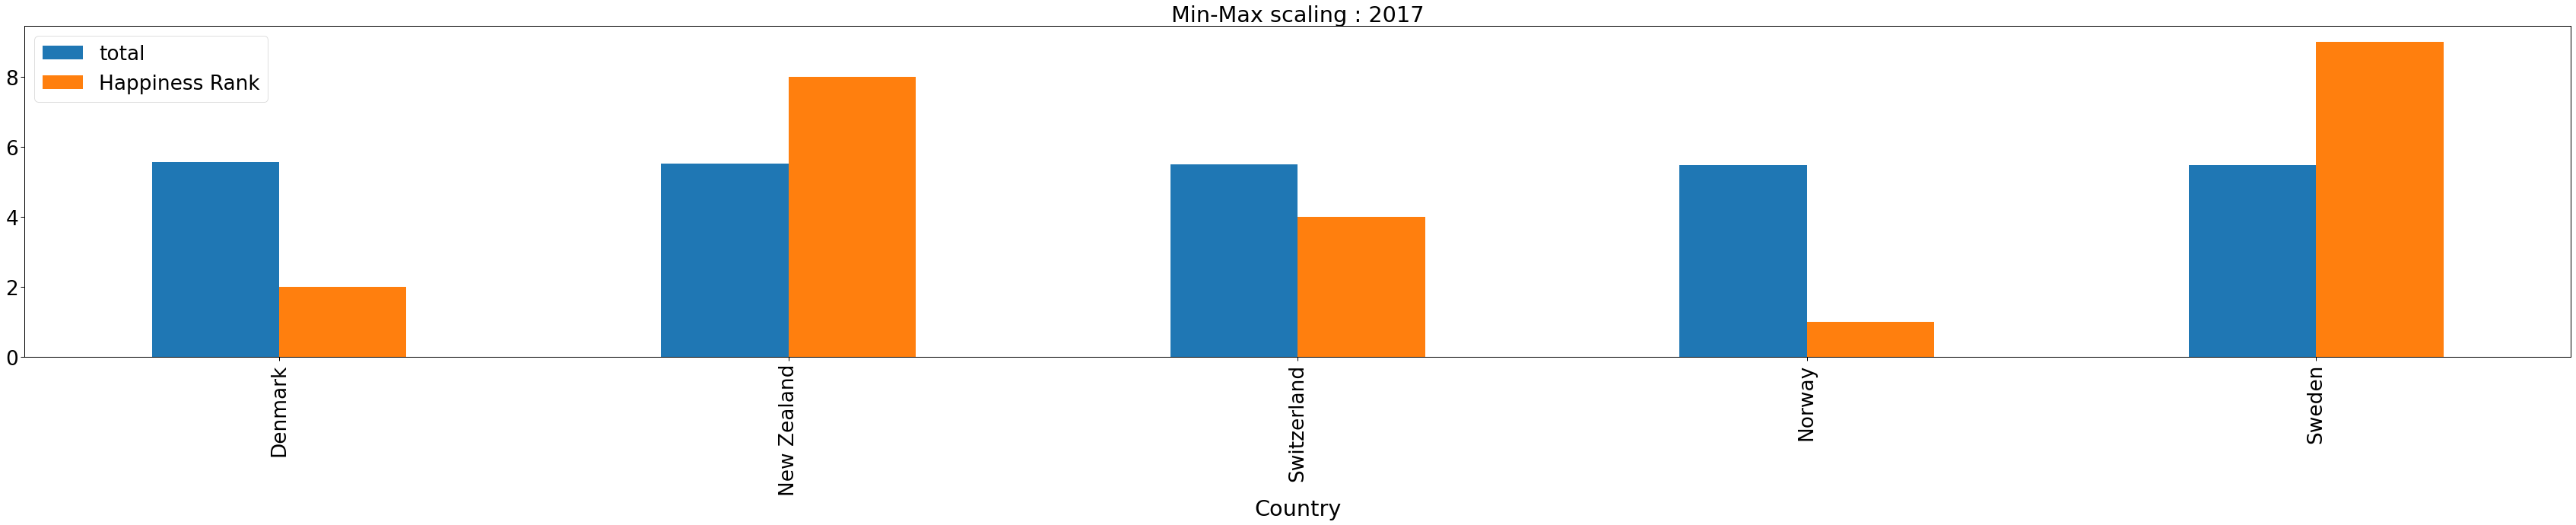

Z-SC0RE scaling한 행복 수치 + GDP + Health + Generosity + Dystopia Residual 값의 합 기준 탑 5 정렬
                                Region  Happiness Rank  Economy (GDP per Capita)  Happiness Score  Health (Life Expectancy)  Generosity  Freedom  Trust (Government Corruption)  Dystopia Residual     total  year
Country                                                                                                                                                                                                           
Denmark                 Western Europe               3                   1.32548            7.527                   0.87464     0.34139  0.64938                        0.48357            2.49204  9.887504  2015
New Zealand  Australia and New Zealand               9                   1.25018            7.286                   0.90837     0.47501  0.63938                        0.42922            2.26425  9.750835  2015
Switzerland             Western Europe               1                

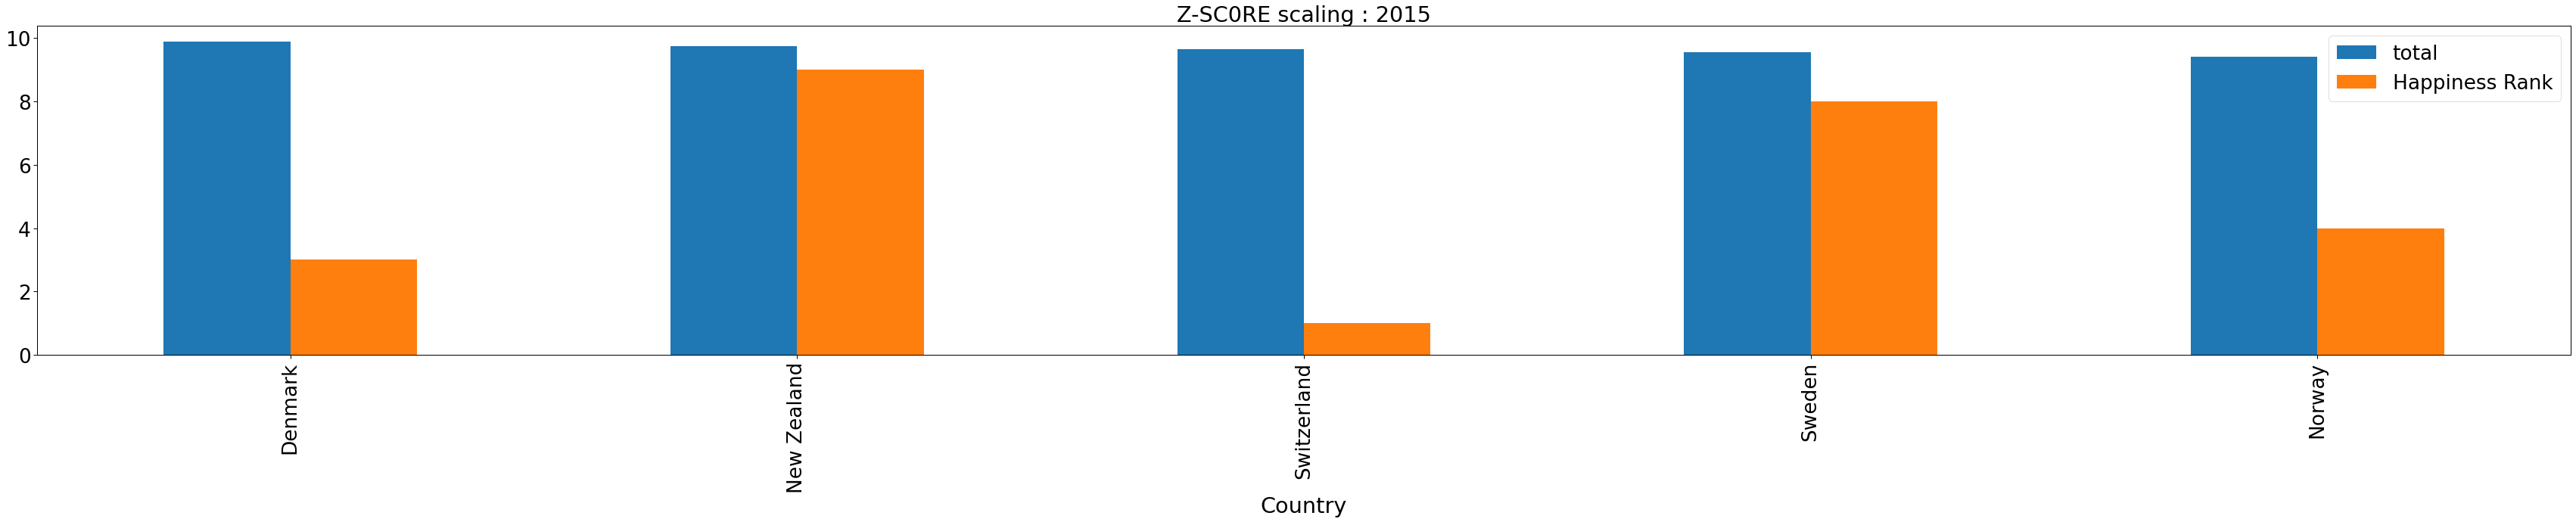

                                Region  Happiness Rank  Economy (GDP per Capita)  Happiness Score  Health (Life Expectancy)  Generosity  Freedom  Trust (Government Corruption)  Dystopia Residual      total  year
Country                                                                                                                                                                                                            
New Zealand  Australia and New Zealand               8                   1.36066            7.334                   0.83096     0.49401  0.58147                        0.41904            2.47553  10.023737  2016
Denmark                 Western Europe               1                   1.44178            7.526                   0.79504     0.36171  0.57941                        0.44453            2.73939   9.944819  2016
Norway                  Western Europe               4                   1.57744            7.498                   0.79579     0.37895  0.59609        

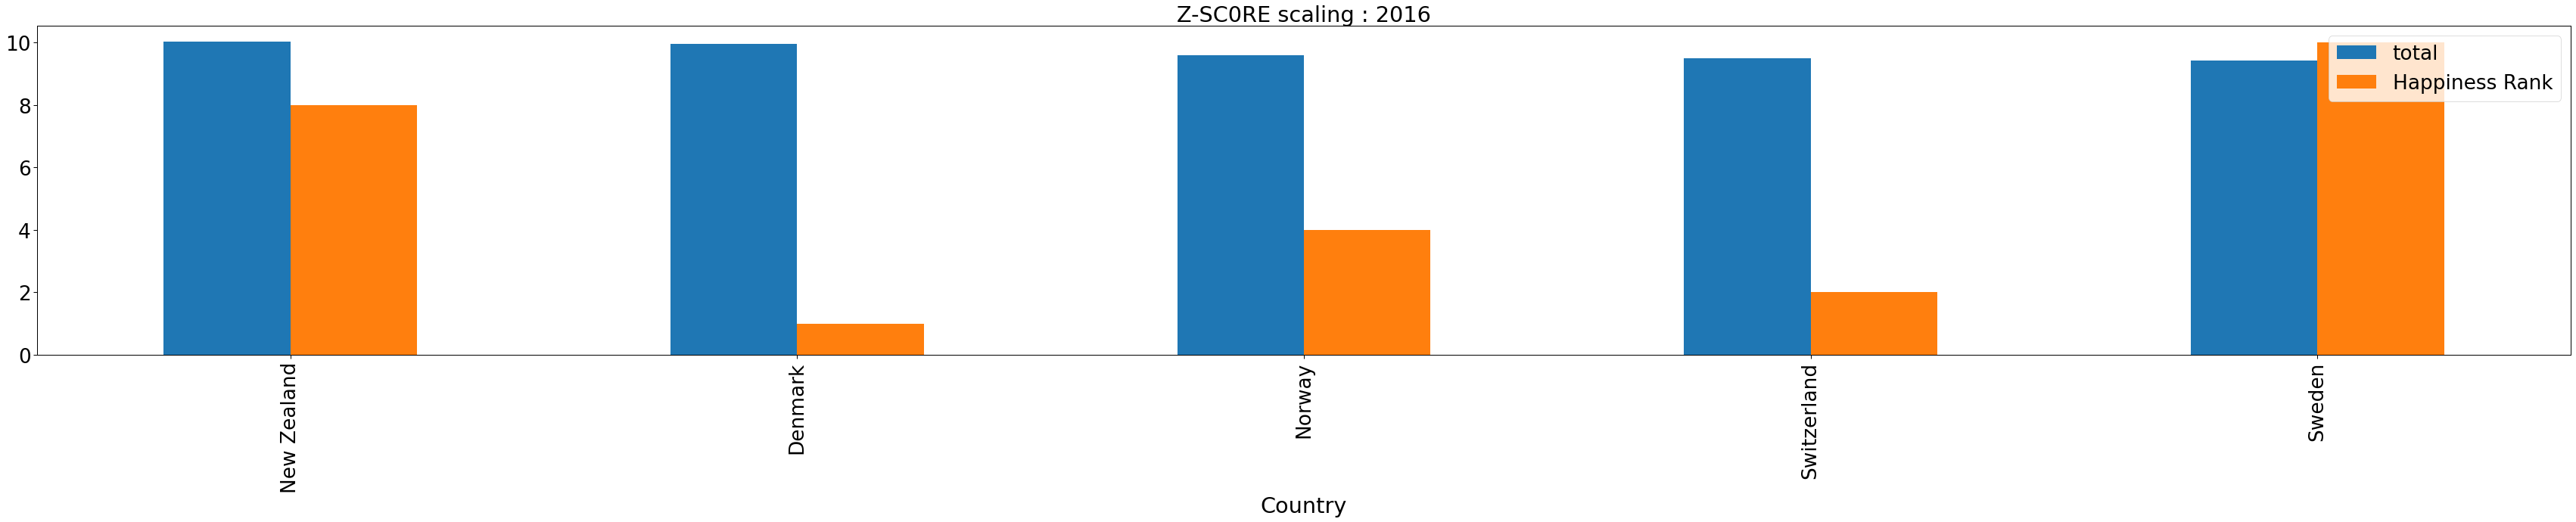

                                Region  Happiness Rank  Economy (GDP per Capita)  Happiness Score  Health (Life Expectancy)  Generosity   Freedom  Trust (Government Corruption)  Dystopia Residual      total  year
Country                                                                                                                                                                                                             
New Zealand  Australia and New Zealand               8                  1.405706            7.314                  0.816760    0.500005  0.614062                       0.382817           2.046456  10.046163  2017
Denmark                 Western Europe               2                  1.482383            7.522                  0.792566    0.355280  0.626007                       0.400770           2.313707  10.027123  2017
Norway                  Western Europe               1                  1.616463            7.537                  0.796667    0.362012  0.635423   

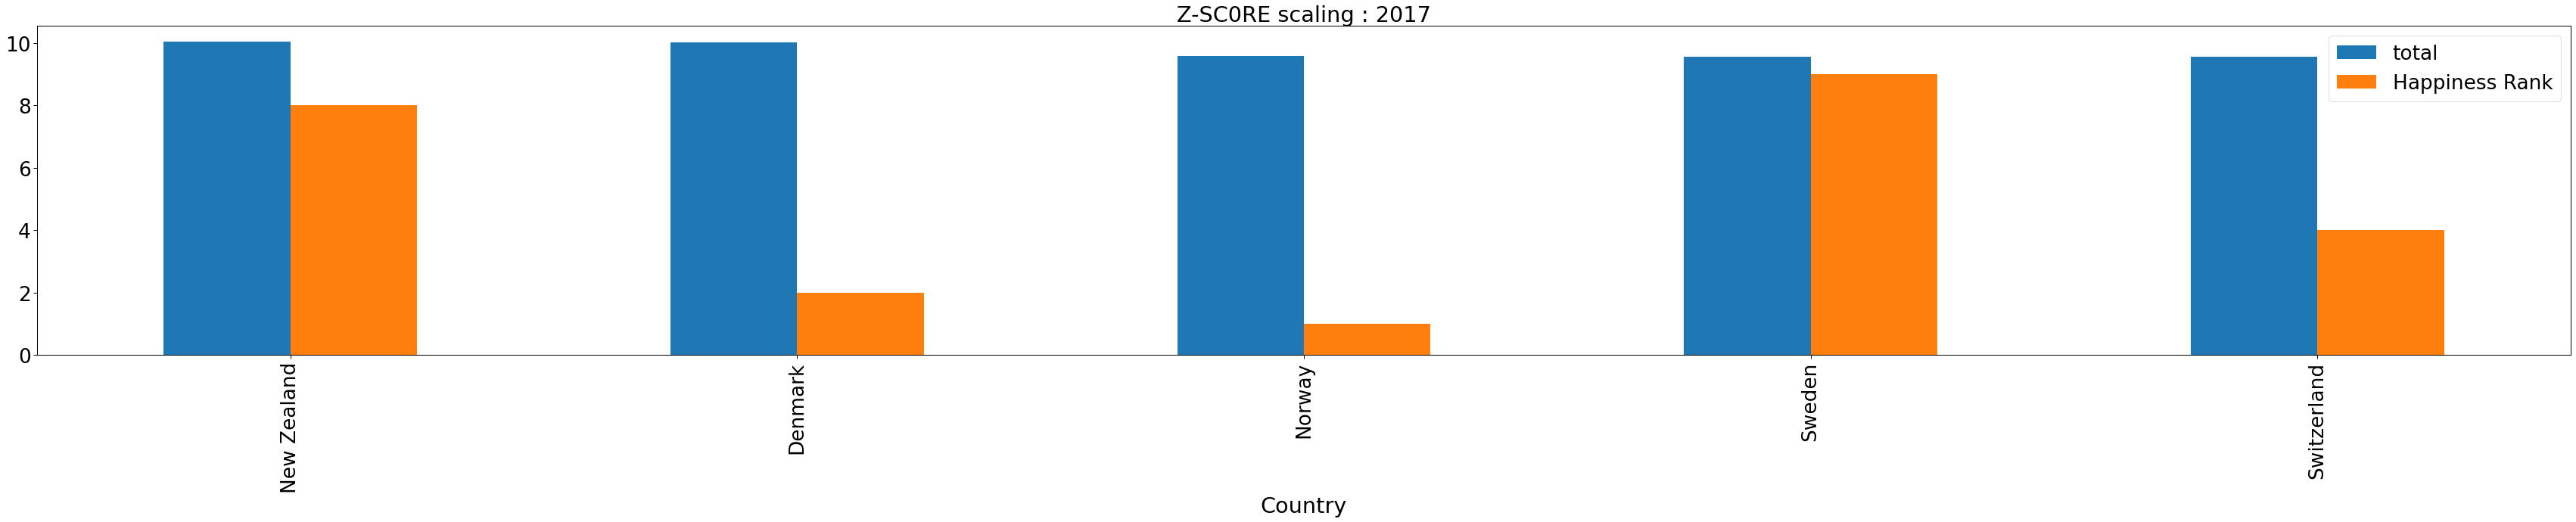

In [ ]:
'''
min_max_scaling으로 합산한 Total 값으로 연도별 Top를 추정한 결과, 대개 많은 total 지수가 큰 나라가 행복 지수 등수가 높은 것(1,2,3등을 높다고 하겠다) 을 알게 되었다.
하지만 Singapore는 다른 나라와는 다르게 가장 높은 total지수를 가지고 있음에도 불구하고 다음과 같이 행복지수에 있어 낮은 점수를 같는다는 것을 알게 되었다.
이에 어떤 요소를 빼서 다음과 같은 결과를 얻었는지 분석하였다.
2015 - 2019년도 자료는 각기 다른 column값을 가지고 있으며 , 연도별로 행복지수를 산정하는 방식이 다르다는 것을 알 수 있다.
2019년 자료에 Dystopia Residual column 데이터가 존재하지않아 이를 배제하였는데, 해당 요소가 포함되지 않은 것이 total지수의 등수에 영향을 미쳐 다음과 같은 데이터가 나오게 되었다.

대개 가장 높은 등수의 국가는 잔차지수가 높으나, 싱가포르는 상대적으로 낮다
2016년 1등 덴마크    2.73939 
2016년 22등 싱가포르 1.99375
해당 지수가 포함되어야 올바른 데이터가 나올 것이라 생각된다.
'''


import copy
print('min_max scaling한 행복 수치 + GDP + Health + Generosity + Dystopia Residual 값의 합 기준 탑 5 정렬')

for i in range(len(file_all)-2) :
  temp_file = file_all[i].copy(deep='True') 
  scaling = feture_scaling(temp_file,column =['Happiness Rank','Economy (GDP per Capita)', 'Happiness Score','Health (Life Expectancy)','Generosity','Freedom','Trust (Government Corruption)','Dystopia Residual'])
  file_all[i]['total']=scaling['Happiness Score']+scaling['Economy (GDP per Capita)']+scaling['Health (Life Expectancy)']+scaling['Generosity']+scaling['Freedom']+scaling['Trust (Government Corruption)']+scaling['Dystopia Residual']    
  all_scaling = file_all[i].sort_values(by = 'total',ascending = False).head(5)[['Country','Region', 'Happiness Rank','Economy (GDP per Capita)', 'Happiness Score','Health (Life Expectancy)','Generosity','Freedom','Trust (Government Corruption)','Dystopia Residual','total','year']]
  all_scaling = all_scaling.set_index('Country')
  print(all_scaling.head())
  all_scaling.plot(kind = 'bar',y=['total','Happiness Rank'],figsize=(60,8))
  plt.title('Min-Max scaling : {}'.format(2015+i))
  plt.show()

'''
잔차를 포함하니, 행복 지수 순위에 더욱 가까워졌다는 것을 알 수 있다.
이 CSV파일 이외의 다른 추가적인 요소에서 등수가 확정될 것 같다.
'''
print('Z-SC0RE scaling한 행복 수치 + GDP + Health + Generosity + Dystopia Residual 값의 합 기준 탑 5 정렬')

for i in range(len(file_all)-2) :
  temp_file = file_all[i].copy(deep='True') 
  scaling = feture_scaling(temp_file,scaling_strategy='z-score',column =['Happiness Rank','Economy (GDP per Capita)', 'Happiness Score','Health (Life Expectancy)','Generosity','Freedom','Trust (Government Corruption)','Dystopia Residual'])
  file_all[i]['total']=scaling['Happiness Score']+scaling['Economy (GDP per Capita)']+scaling['Health (Life Expectancy)']+scaling['Generosity']+scaling['Freedom']+scaling['Trust (Government Corruption)']+scaling['Dystopia Residual']    
  all_scaling = file_all[i].sort_values(by = 'total',ascending = False).head(5)[['Country','Region', 'Happiness Rank','Economy (GDP per Capita)', 'Happiness Score','Health (Life Expectancy)','Generosity','Freedom','Trust (Government Corruption)','Dystopia Residual','total','year']]
  all_scaling = all_scaling.set_index('Country')
  print(all_scaling.head())
  all_scaling.plot(kind = 'bar',y=['total','Happiness Rank'],figsize=(60,8))
  plt.title('Z-SC0RE scaling : {}'.format(2015+i))
  plt.show()



        Country        Region  ...  Whisker.low  Social support
46  South Korea  Eastern Asia  ...          NaN             NaN
57  South Korea  Eastern Asia  ...          NaN             NaN
54  South Korea  Eastern Asia  ...     5.753441             NaN
56  South Korea  Eastern Asia  ...          NaN           1.204
53  South Korea  Eastern Asia  ...          NaN           1.219

[5 rows x 19 columns]


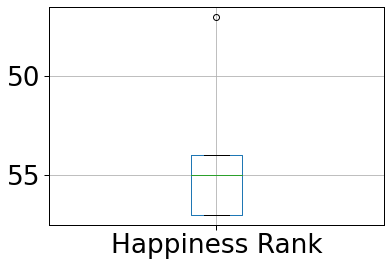

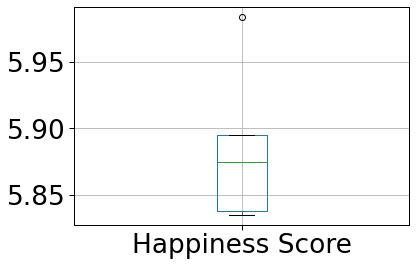

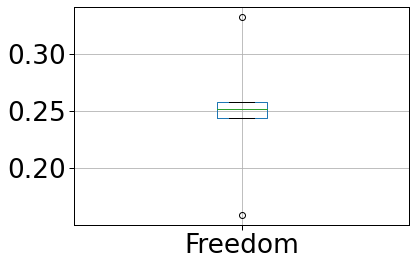

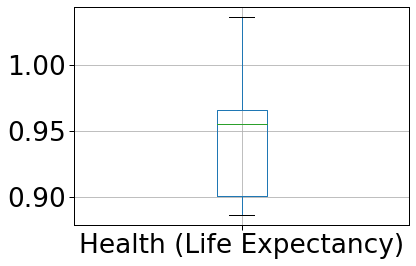

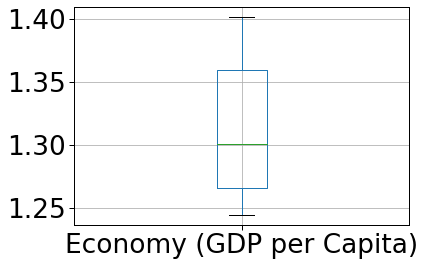

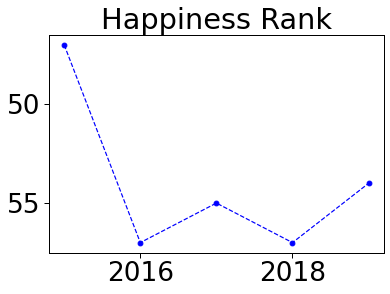

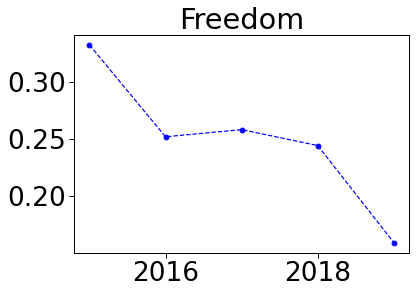

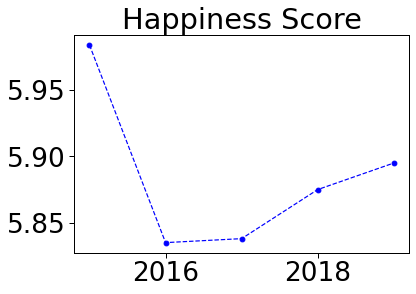

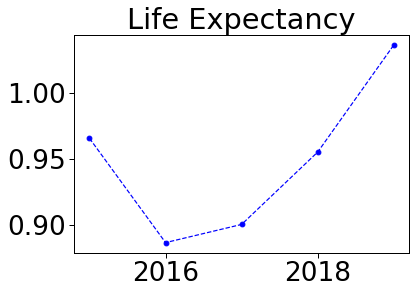

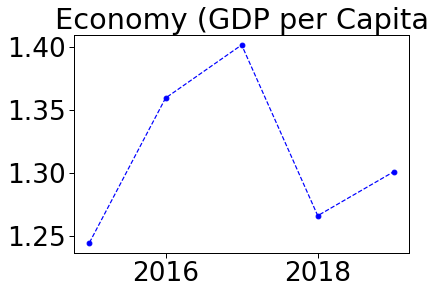

In [ ]:
# 각 지역별 평균 행복지수 및 최대 최소 지역
korea =[]
for i in range(len(file_all)) :
  year_kor = pd.DataFrame(file_all[i][file_all[i]['Country']== 'South Korea'])
  korea.append(year_kor)

all_kor = pd.concat(korea,axis = 0)
print(all_kor)
plt.gca().invert_yaxis()
all_kor.boxplot(column=['Happiness Rank'])
plt.show()
all_kor.boxplot(column=['Happiness Score'])
plt.show()
all_kor.boxplot(column=['Freedom'])
plt.show()
all_kor.boxplot(column=['Health (Life Expectancy)'])
plt.show()
all_kor.boxplot(column=['Economy (GDP per Capita)'])
plt.show()


plt.plot(all_kor['year'],all_kor['Happiness Rank'],'b--o')
plt.gca().invert_yaxis()
plt.title('Happiness Rank')
plt.show()
plt.plot(all_kor['year'],all_kor['Freedom'],'b--o')
plt.title('Freedom')
plt.show()
plt.plot(all_kor['year'],all_kor['Happiness Score'],'b--o')
plt.title('Happiness Score')
plt.show()
plt.title('Life Expectancy')
plt.plot(all_kor['year'],all_kor['Health (Life Expectancy)'],'b--o')
plt.show()
plt.title('Economy (GDP per Capita')
plt.plot(all_kor['year'],all_kor['Economy (GDP per Capita)'],'b--o')
plt.show()



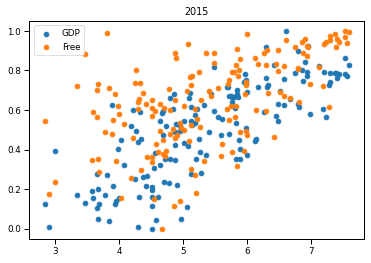

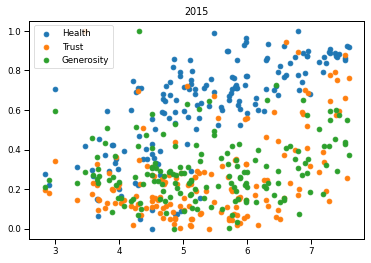

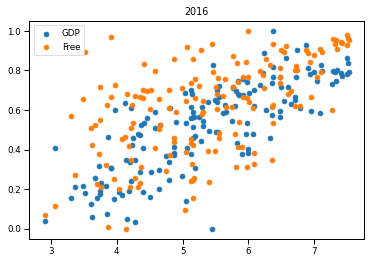

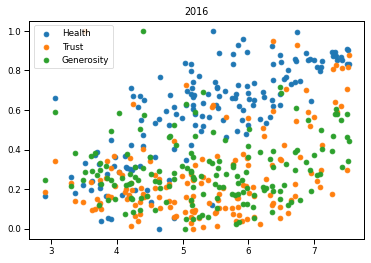

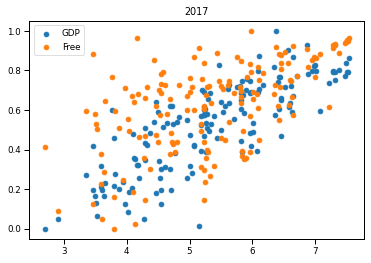

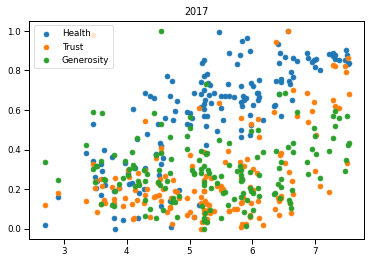

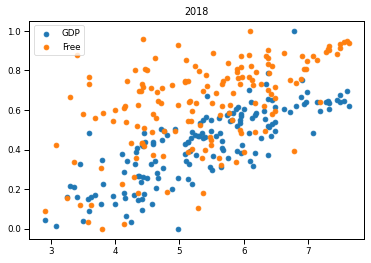

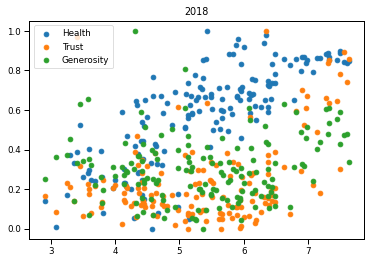

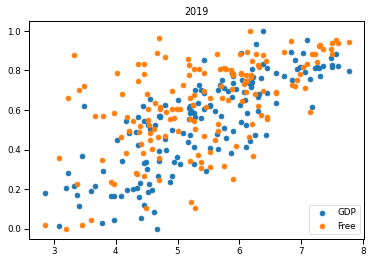

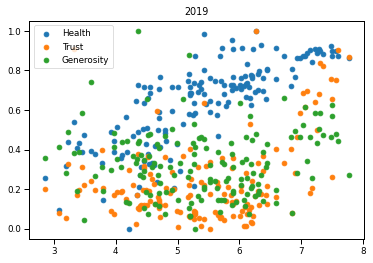

In [ ]:
sns.set_context("paper", font_scale=1) #텍스트 크기조정
for i in range(len(file_all)) :
  file_all[i] = feture_scaling(file_all[i],column =['Economy (GDP per Capita)','Health (Life Expectancy)','Freedom','Generosity','Trust (Government Corruption)'])
  plt.scatter(file_all[i]['Happiness Score'],file_all[i]['Economy (GDP per Capita)'],label = 'GDP')
  plt.scatter(file_all[i]['Happiness Score'],file_all[i]['Freedom'],label='Free')
  plt.title(2015+i)
  plt.legend(loc = "best")
  plt.show()
  plt.scatter(file_all[i]['Happiness Score'],file_all[i]['Health (Life Expectancy)'],label='Health')
  plt.scatter(file_all[i]['Happiness Score'],file_all[i]['Trust (Government Corruption)'],label = 'Trust')
  plt.scatter(file_all[i]['Happiness Score'],file_all[i]['Generosity'],label = 'Generosity')
  plt.title(2015+i)
  plt.legend(loc = "best")
  plt.show()
